# Playground for Parameters

In [2]:
from cmos_noise_map.utils.get_rts_playground import plot_get_rts, noise_distribution
from cmos_noise_map.utils.read_write_utils import read_bias_frames
from cmos_noise_map.utils.data_utils import data_to_pixel
import os
import requests

**Download test data from archive (only need to run once!)**

In [3]:
if not os.path.exists(os.path.join('get_rts_testdata/')):
    os.mkdir(os.path.join('get_rts_testdata/'), mode=0o777)
    write_path = os.path.join('get_rts_testdata/')
    archive_record = requests.get(f'https://archive-api.lco.global/frames/?reduction_level=91&instrument_id=sq30&configuration_type=BIAS&basename=b91&start=2023-01-03%2000%3A00&end=2023-02-01%2023%3A59&public=true').json()['results'][:15]
    for rec in archive_record:
        #Give path to write files to
        with open(f'{write_path}/{rec["filename"]}', 'wb') as f:
            f.write(requests.get(rec['url']).content)
else:
    write_path = os.path.join('get_rts_testdata/')

**Read the files into memory**

In [4]:
#Memory map files in:
write_path = os.path.join('get_rts_testdata/')
images = read_bias_frames(write_path, data_ext=1)

**To use this notebook on your own data, run something like this:**

```
path = path_to_files
data_ext = data_ext
#Memory map files in:
images = read_bias_frames(path, data_ext=data_ext)
```

**Determining --upper_quantile**

The `upper_quantile` quantity indicates the minimum noisiness of the pixel (calculated by taking the standard deviation across images) for it to be evaluated for a random telegraph signal. This cutoff is made at the tail of the right side of a detector noise distribution. This tail is where we see RTS affected pixels.
<br>
The plot below is inteded to help determine the right `upper_quantile` cutoff point for your data, as it can vary depending on the dataset. It is **highly** recommended that the user set this. By default it is at the 80th percentile.

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:298: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


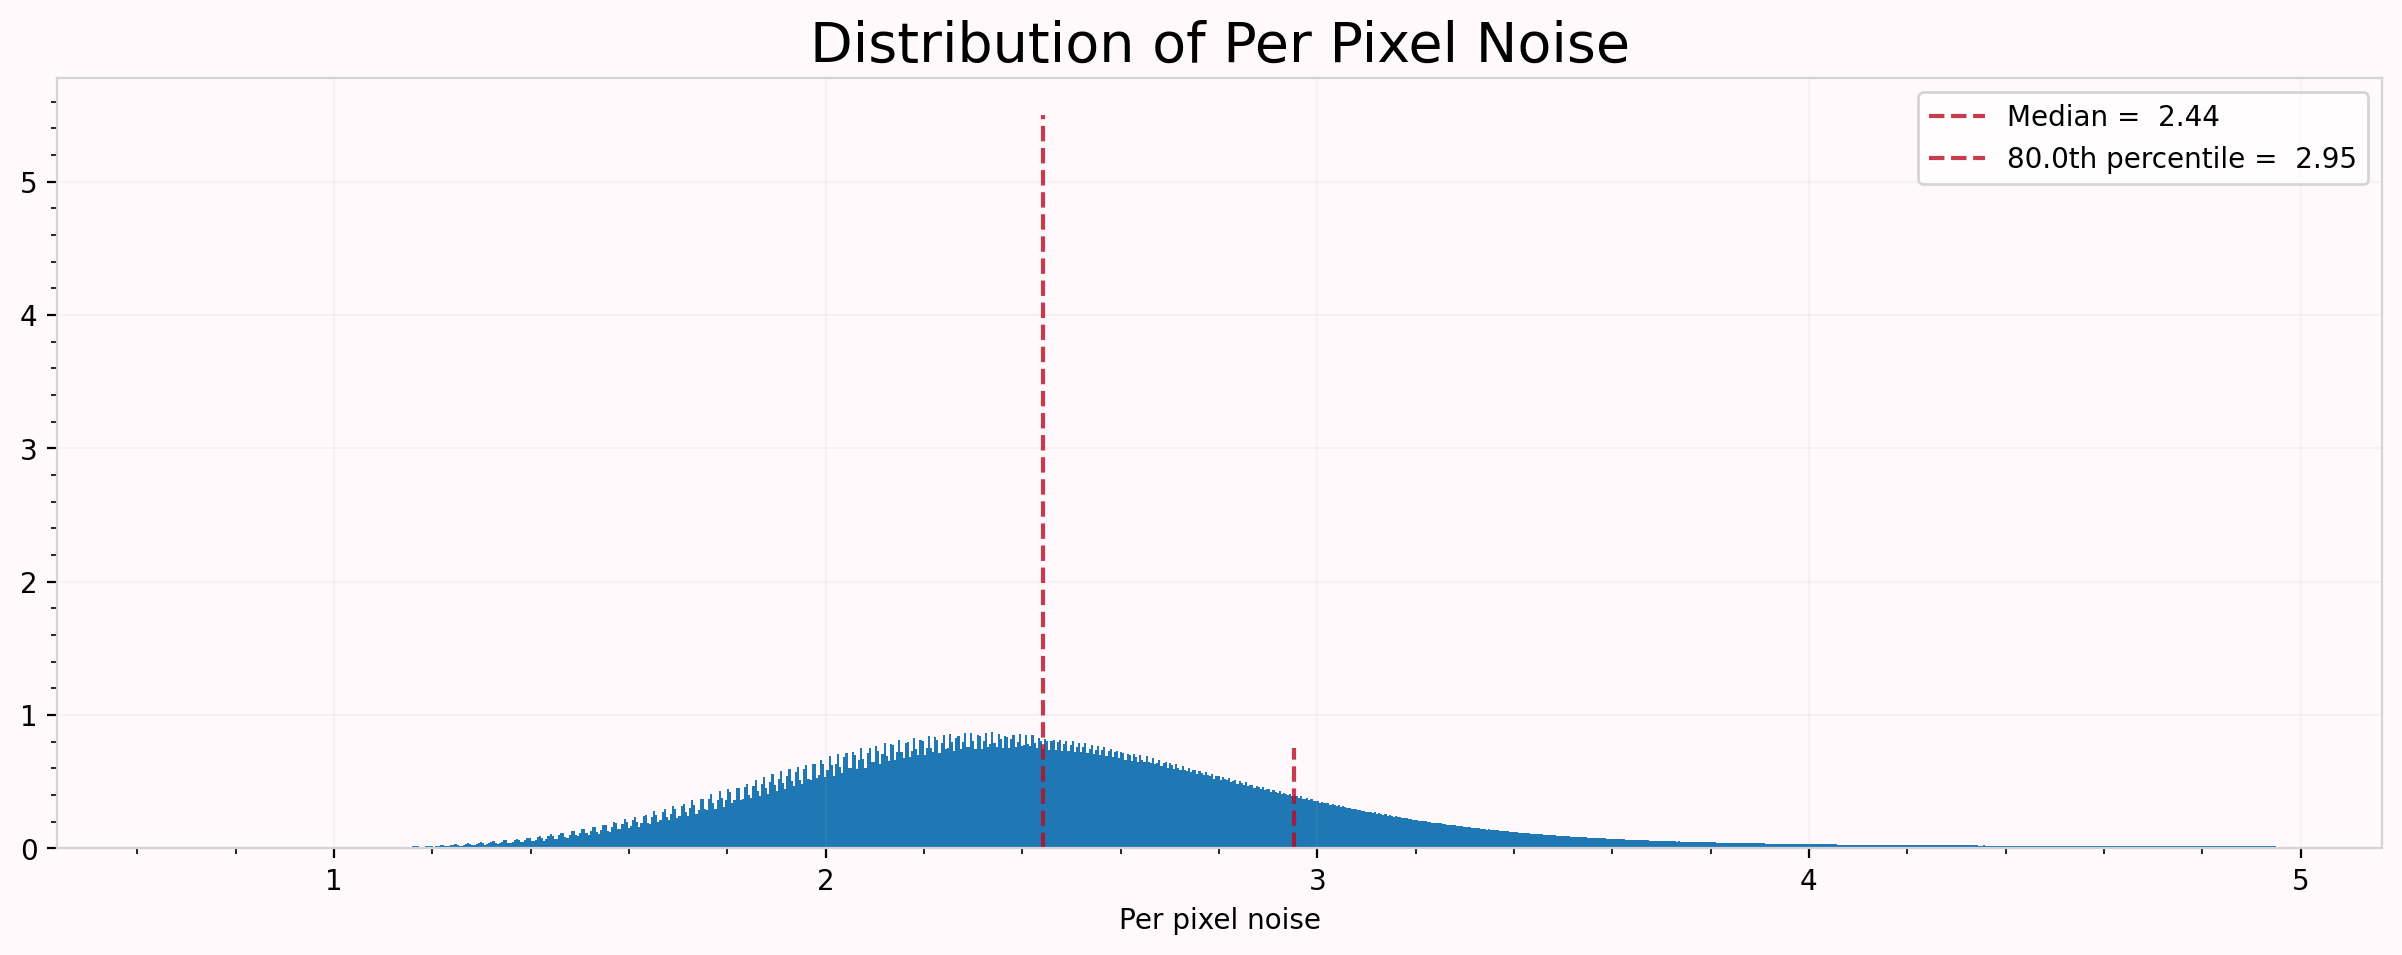

In [5]:
dist = noise_distribution(images, gain=None, data_ext=0)
dist.noise_distribution_plot(upper_quantile=0.80, bins=1000)

Above, we can see that the 80th percentile doesn't necessarily capture the tail of the distribution. If we go ahead with this, we risk overfitting normal pixels, and modelling them as multimodal. Even if we don't overfit, we are wasting valuable time and computational resources!
<br>
Let's try again with a 90th percentile cutoff.

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:298: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


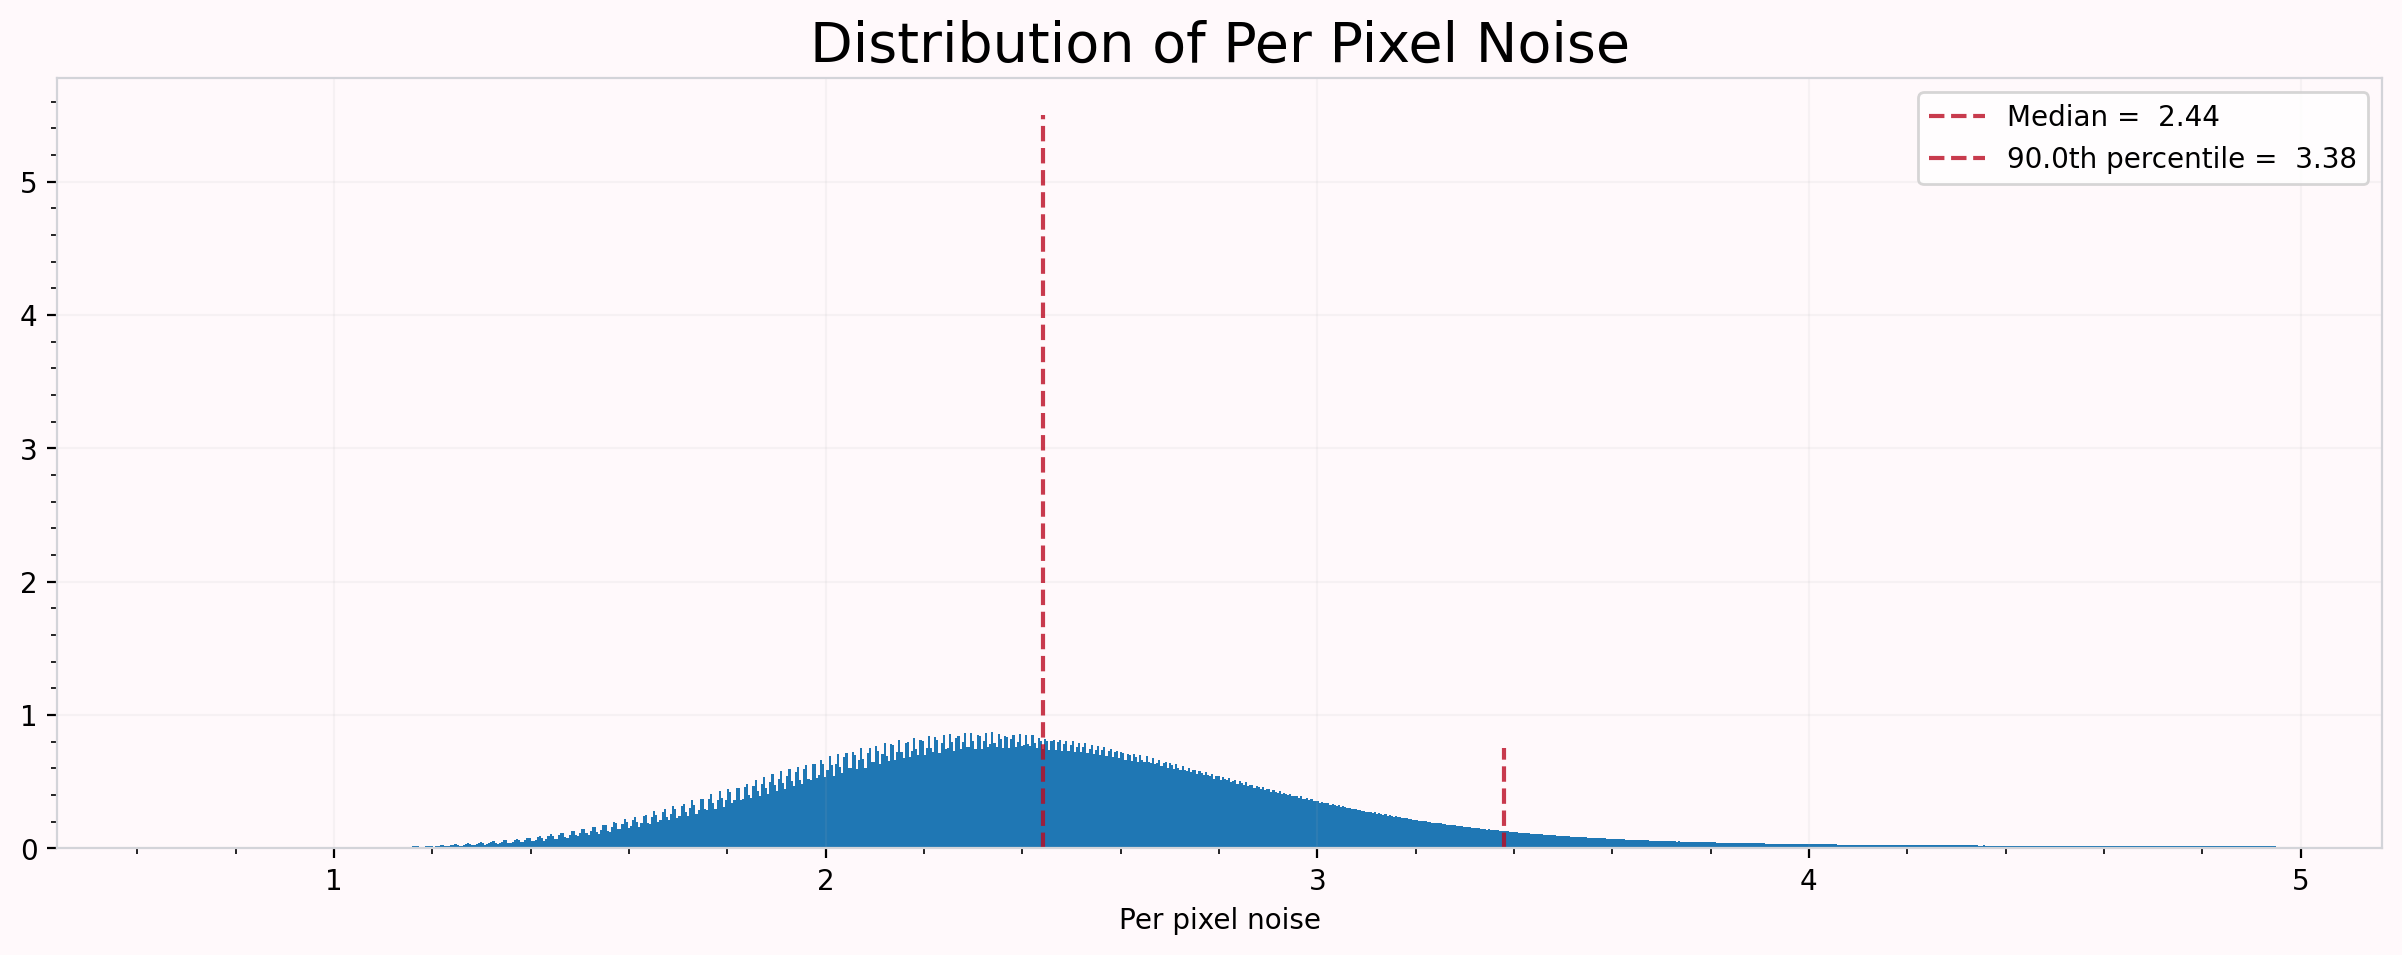

In [6]:
dist.noise_distribution_plot(upper_quantile=0.90, bins=1000)

This better cuts off the tail, so we can use this as our cutoff and rest assured that we are capturing most RTS affected pixels, while not wasting computational resources.

**Determining --tolerance and --min_peak_separation**

Generally we don't need to change the `tolerance` parameter, but the `min_peak_separation` might be good to change depending on your data and the units. 
<br>
Let's look at one row. This is usually plenty of data to find good looking multimodal RTS affected pixels.
<br>
We'll also use the `upper_quantile` determined above! `tolerance` and `min_peak_separation` will be left at their defaults.

**Note** depending on how much data you're passing through, you might wanna force stop this cell when you think you've seen enough.

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


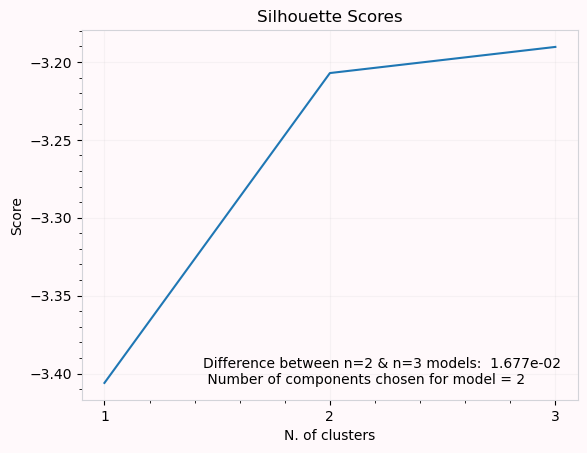

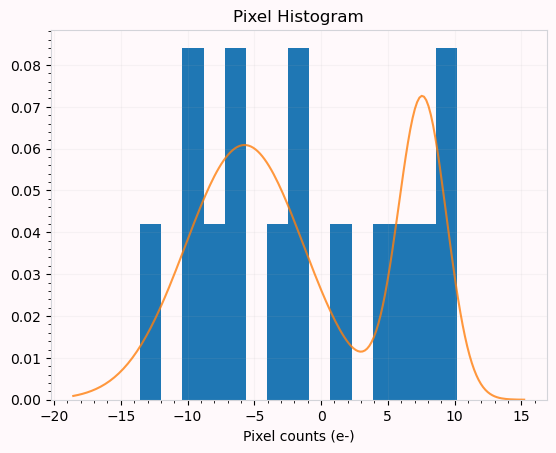

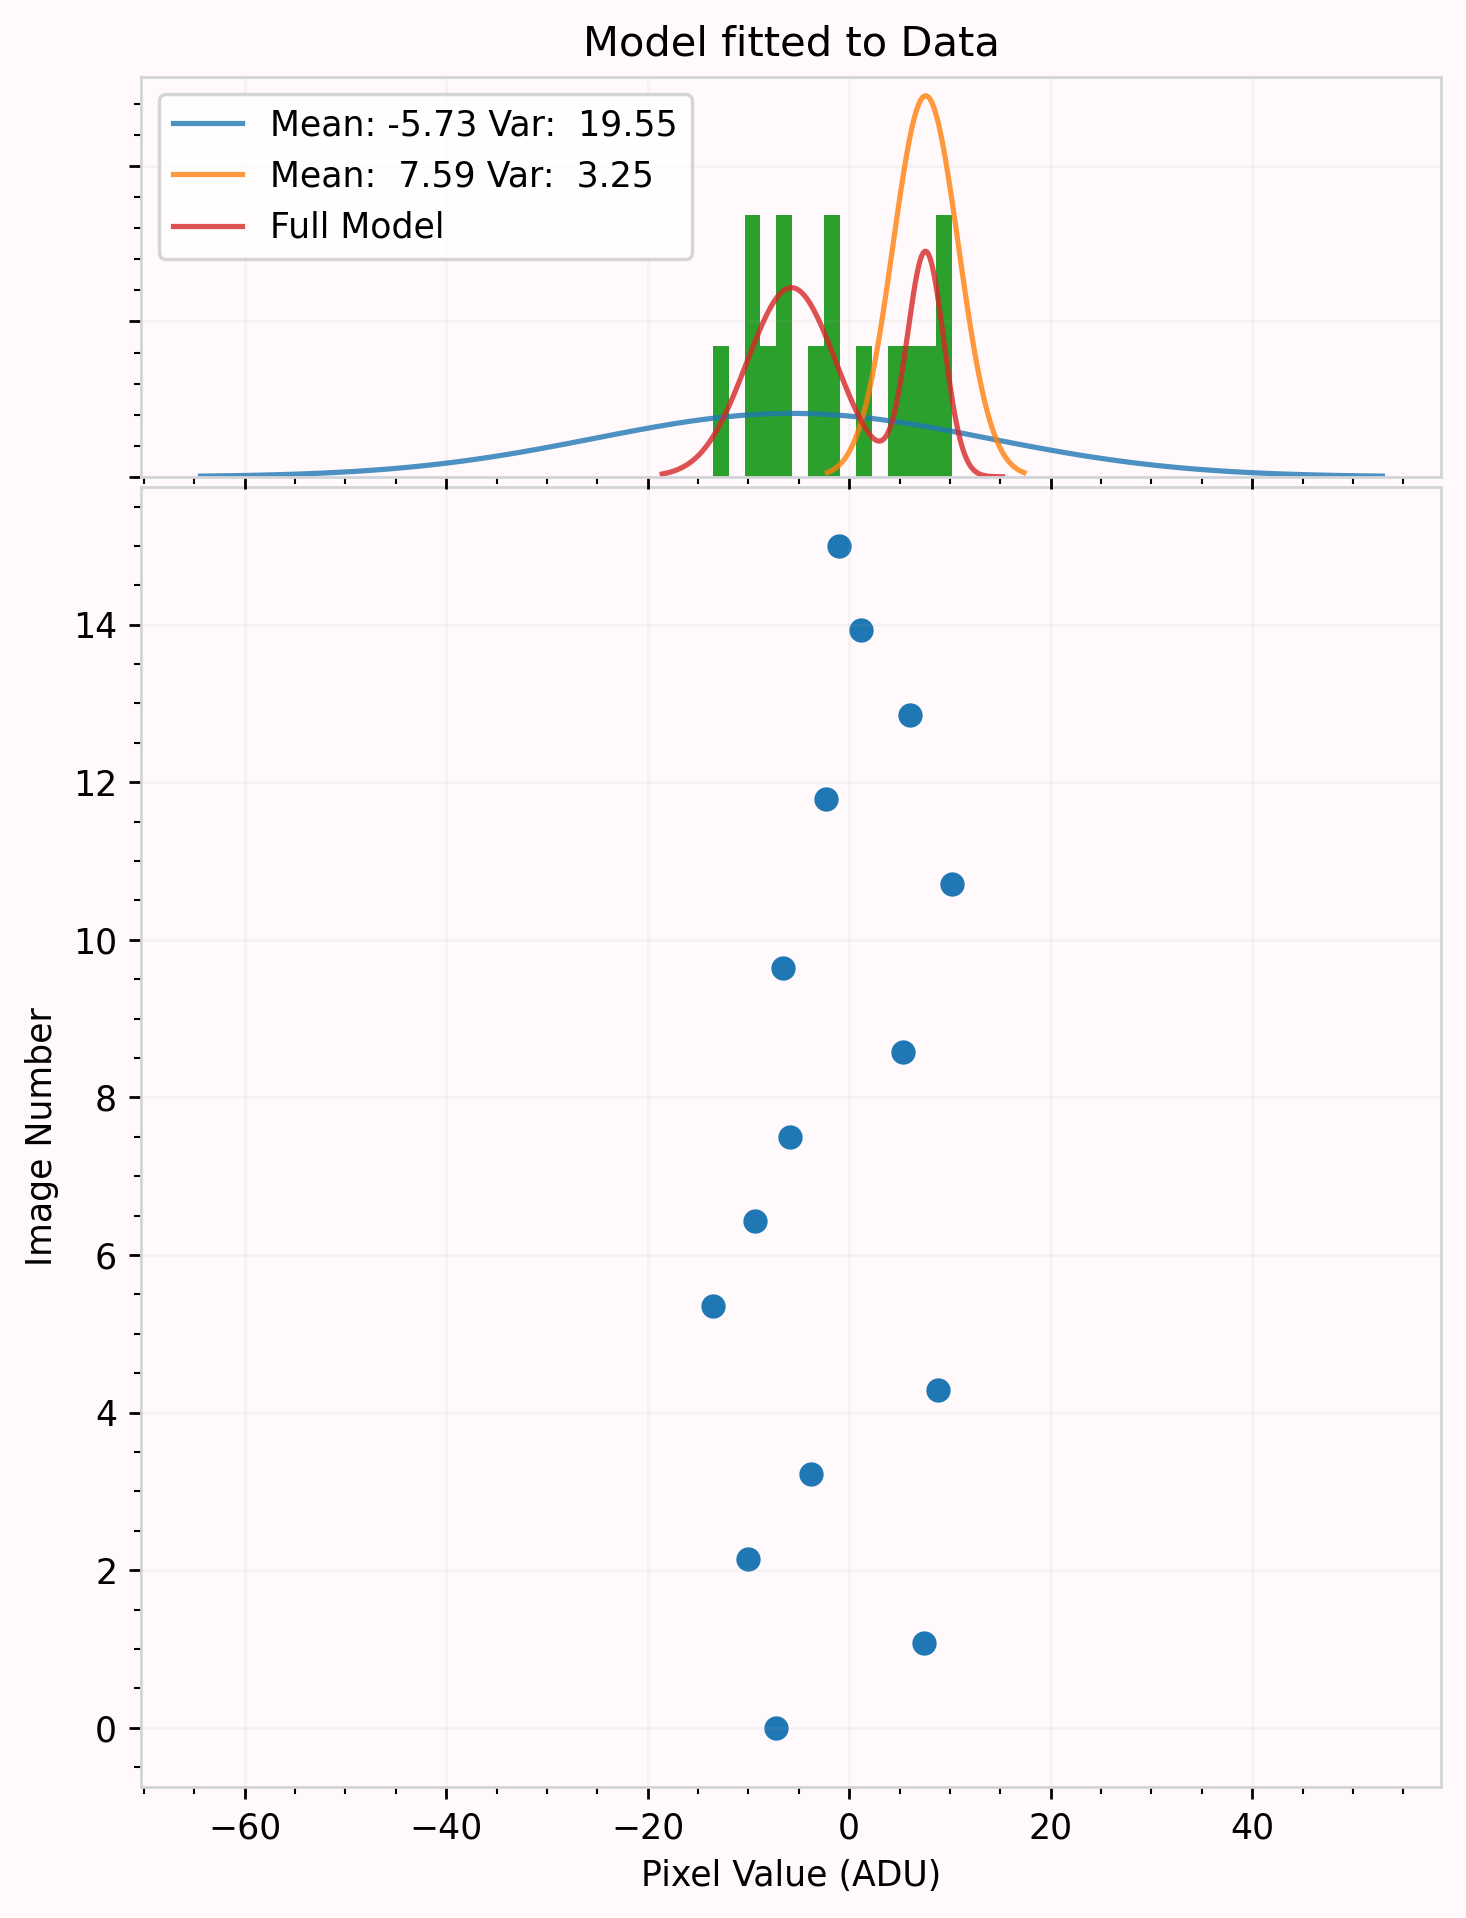

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


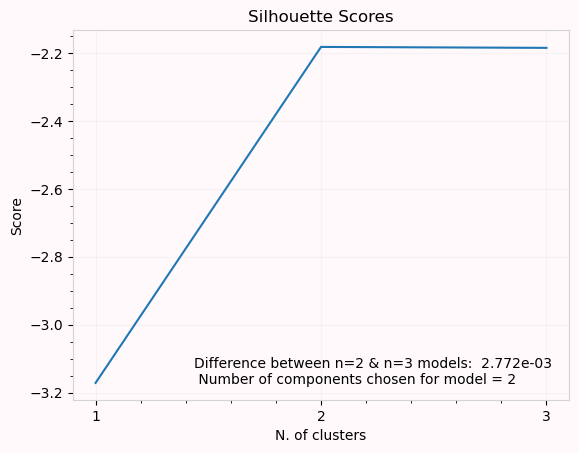

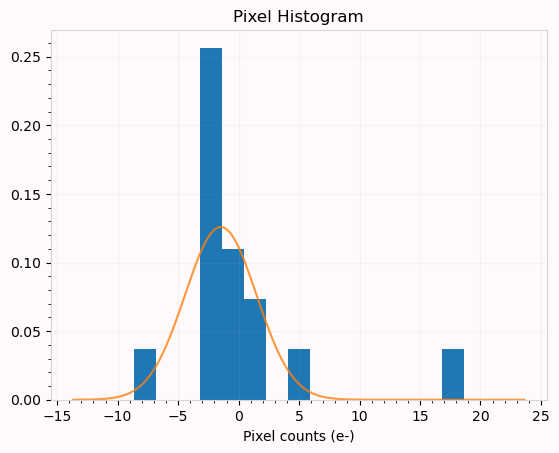

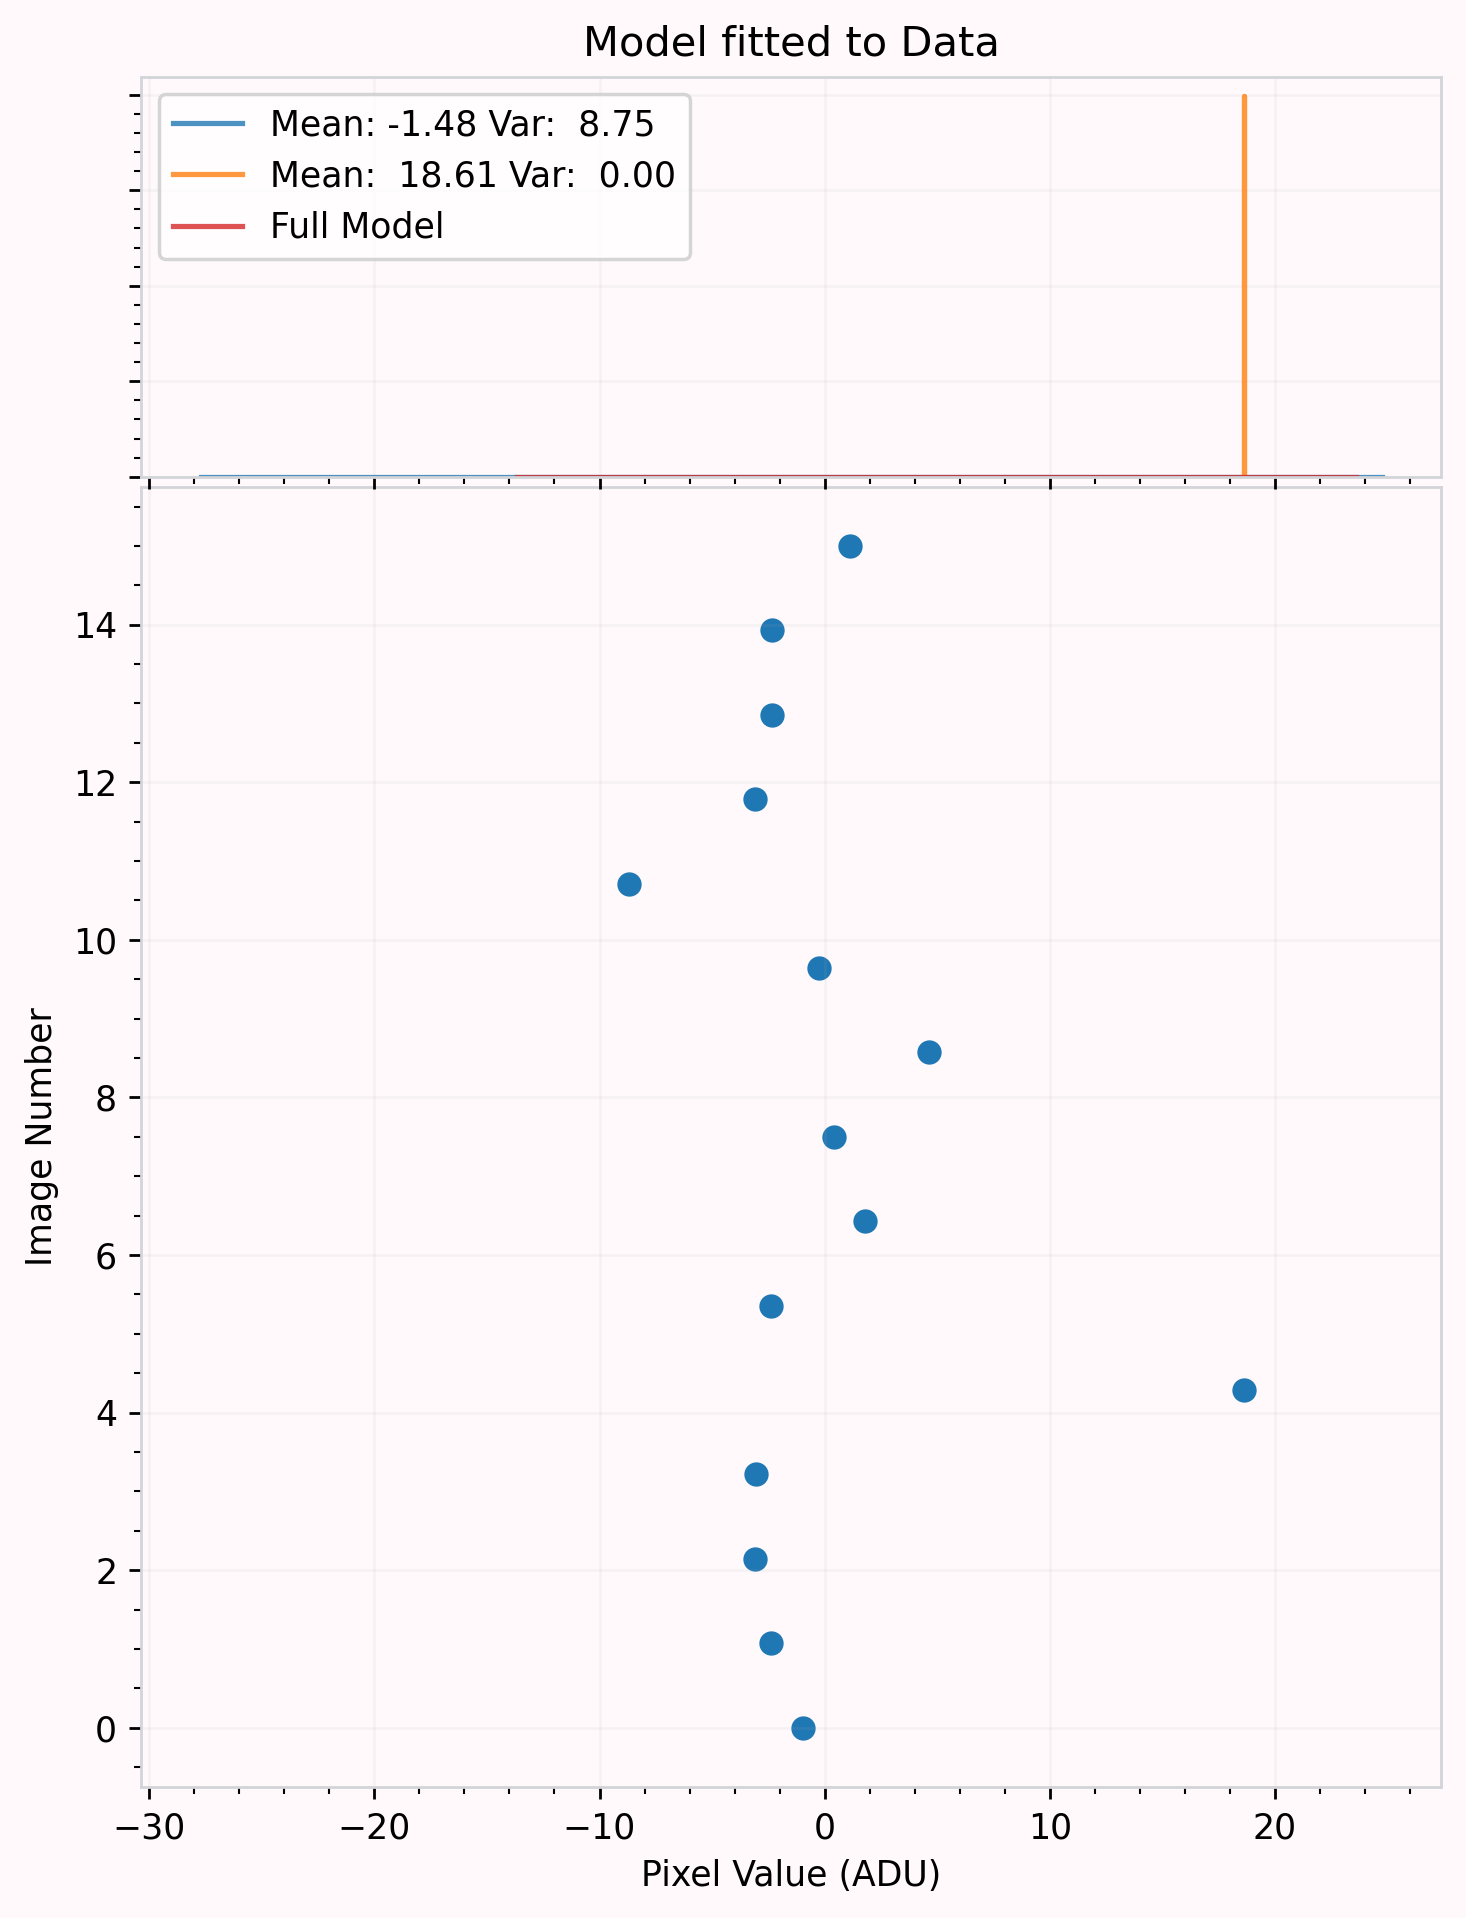

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


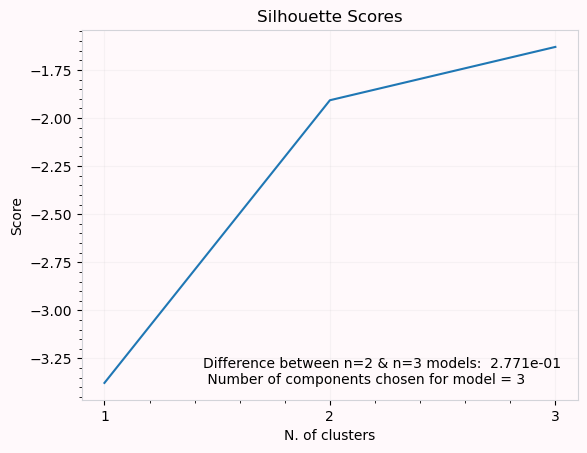

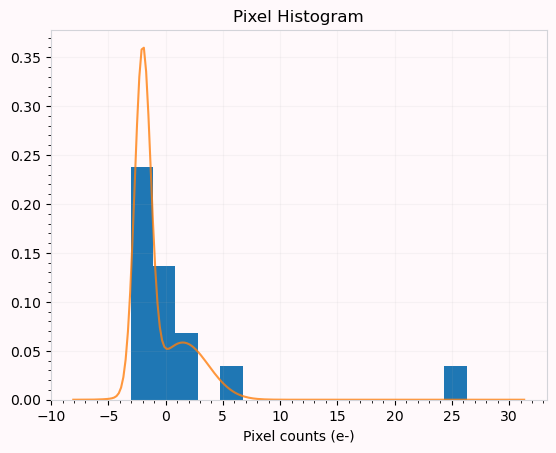

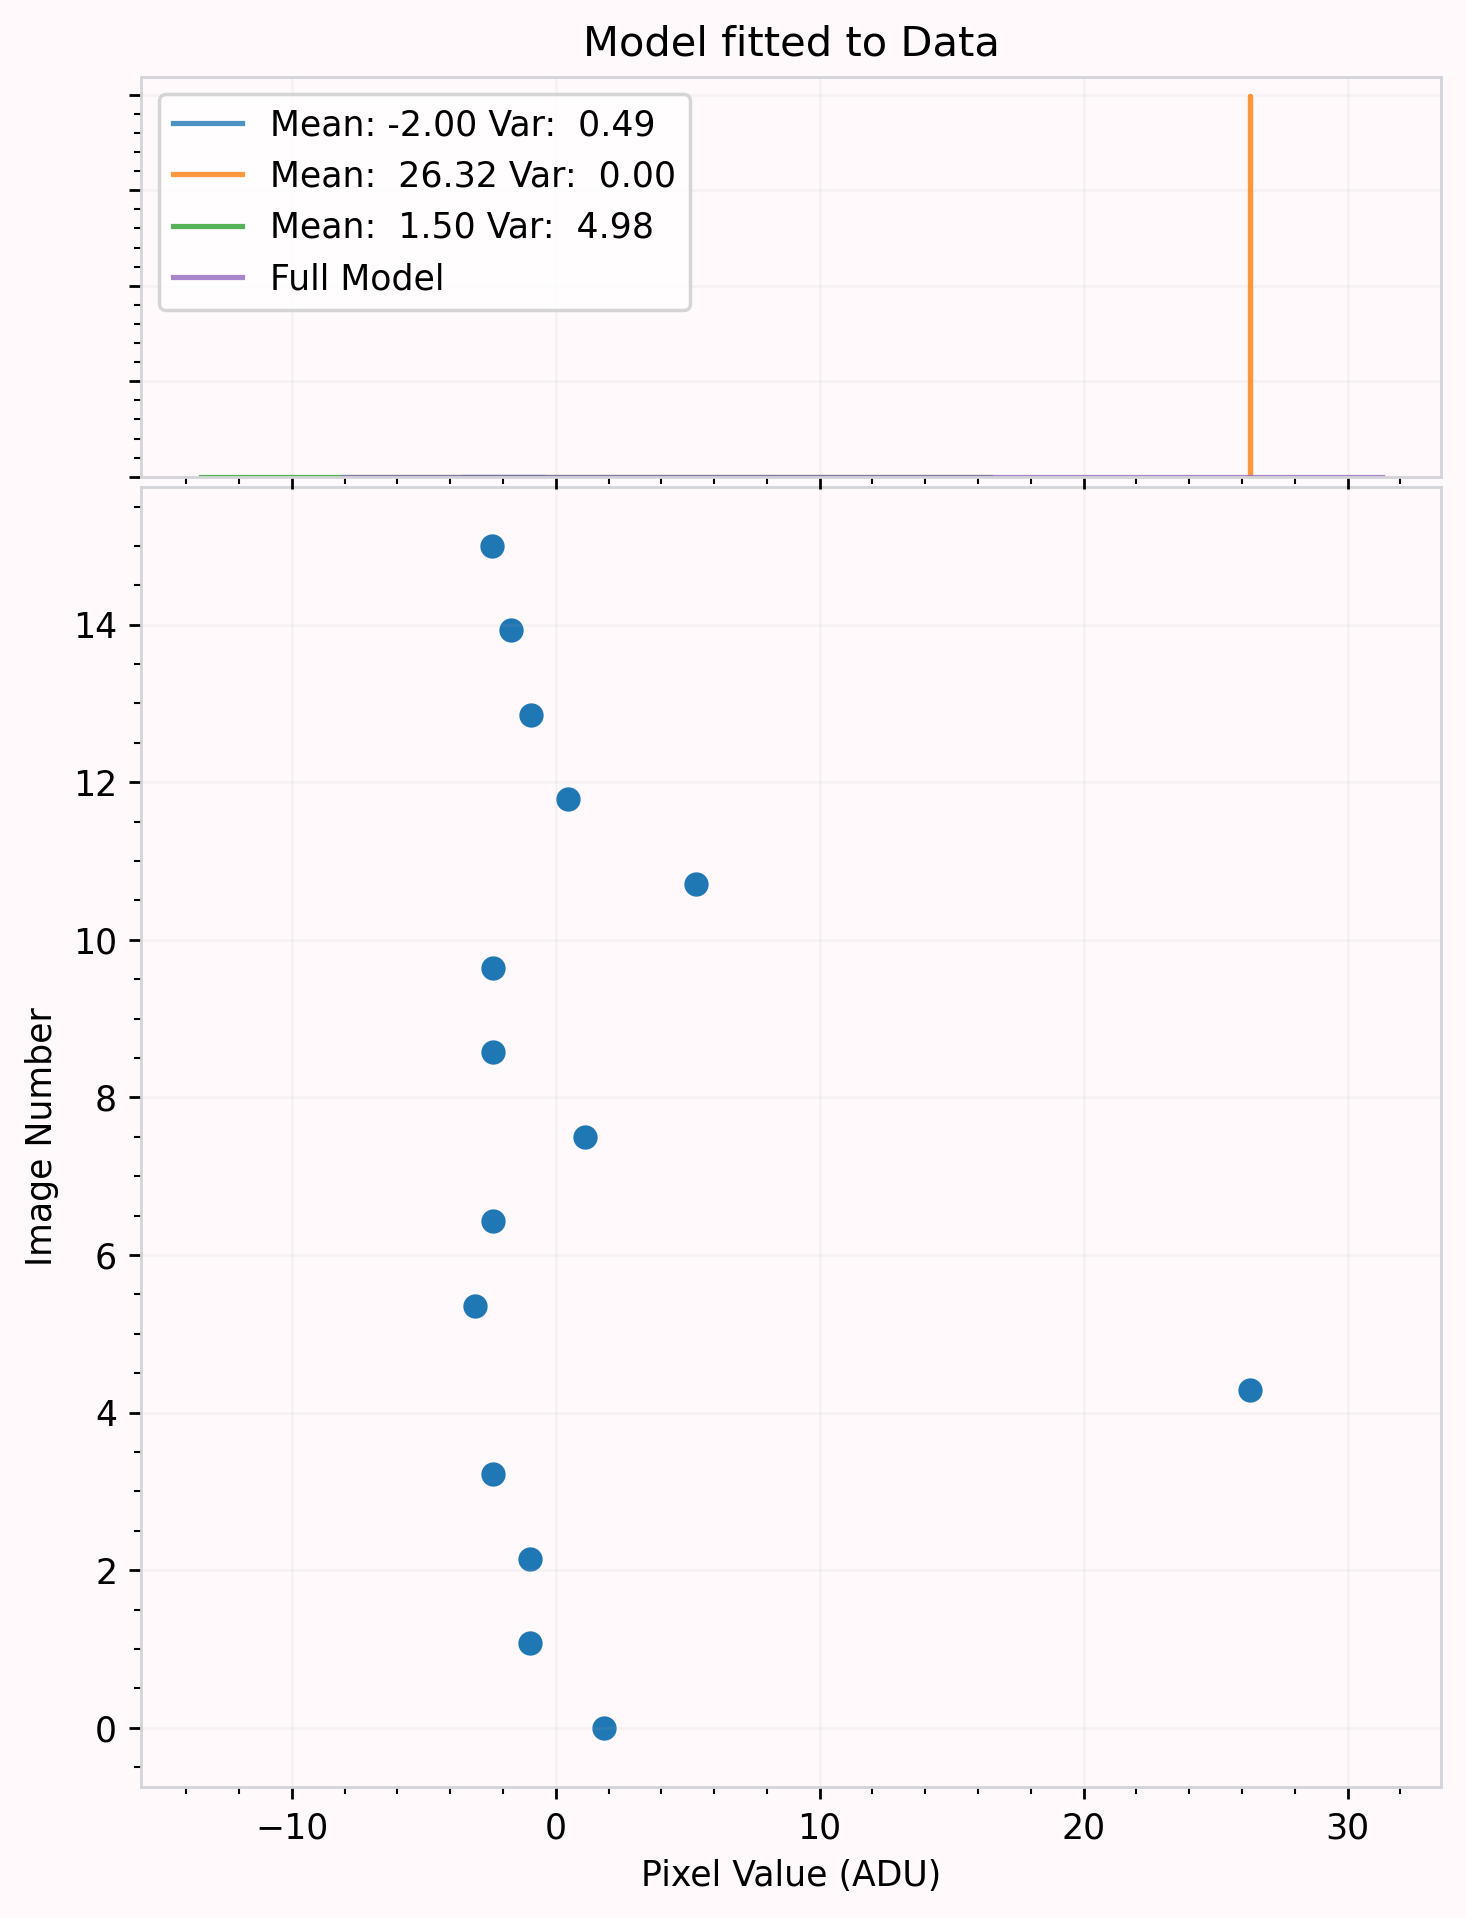

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


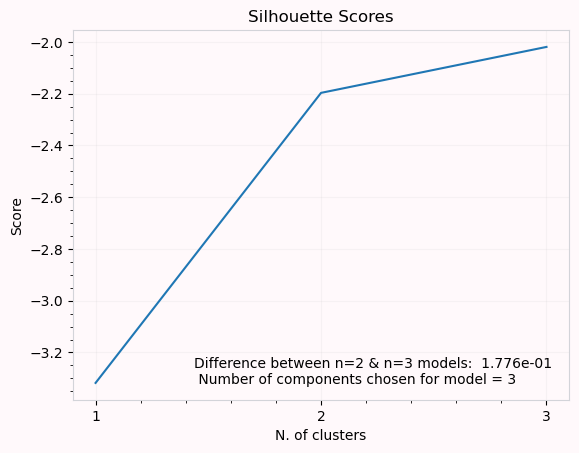

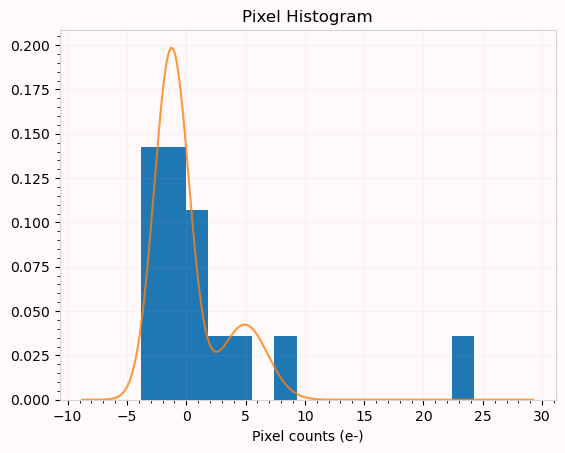

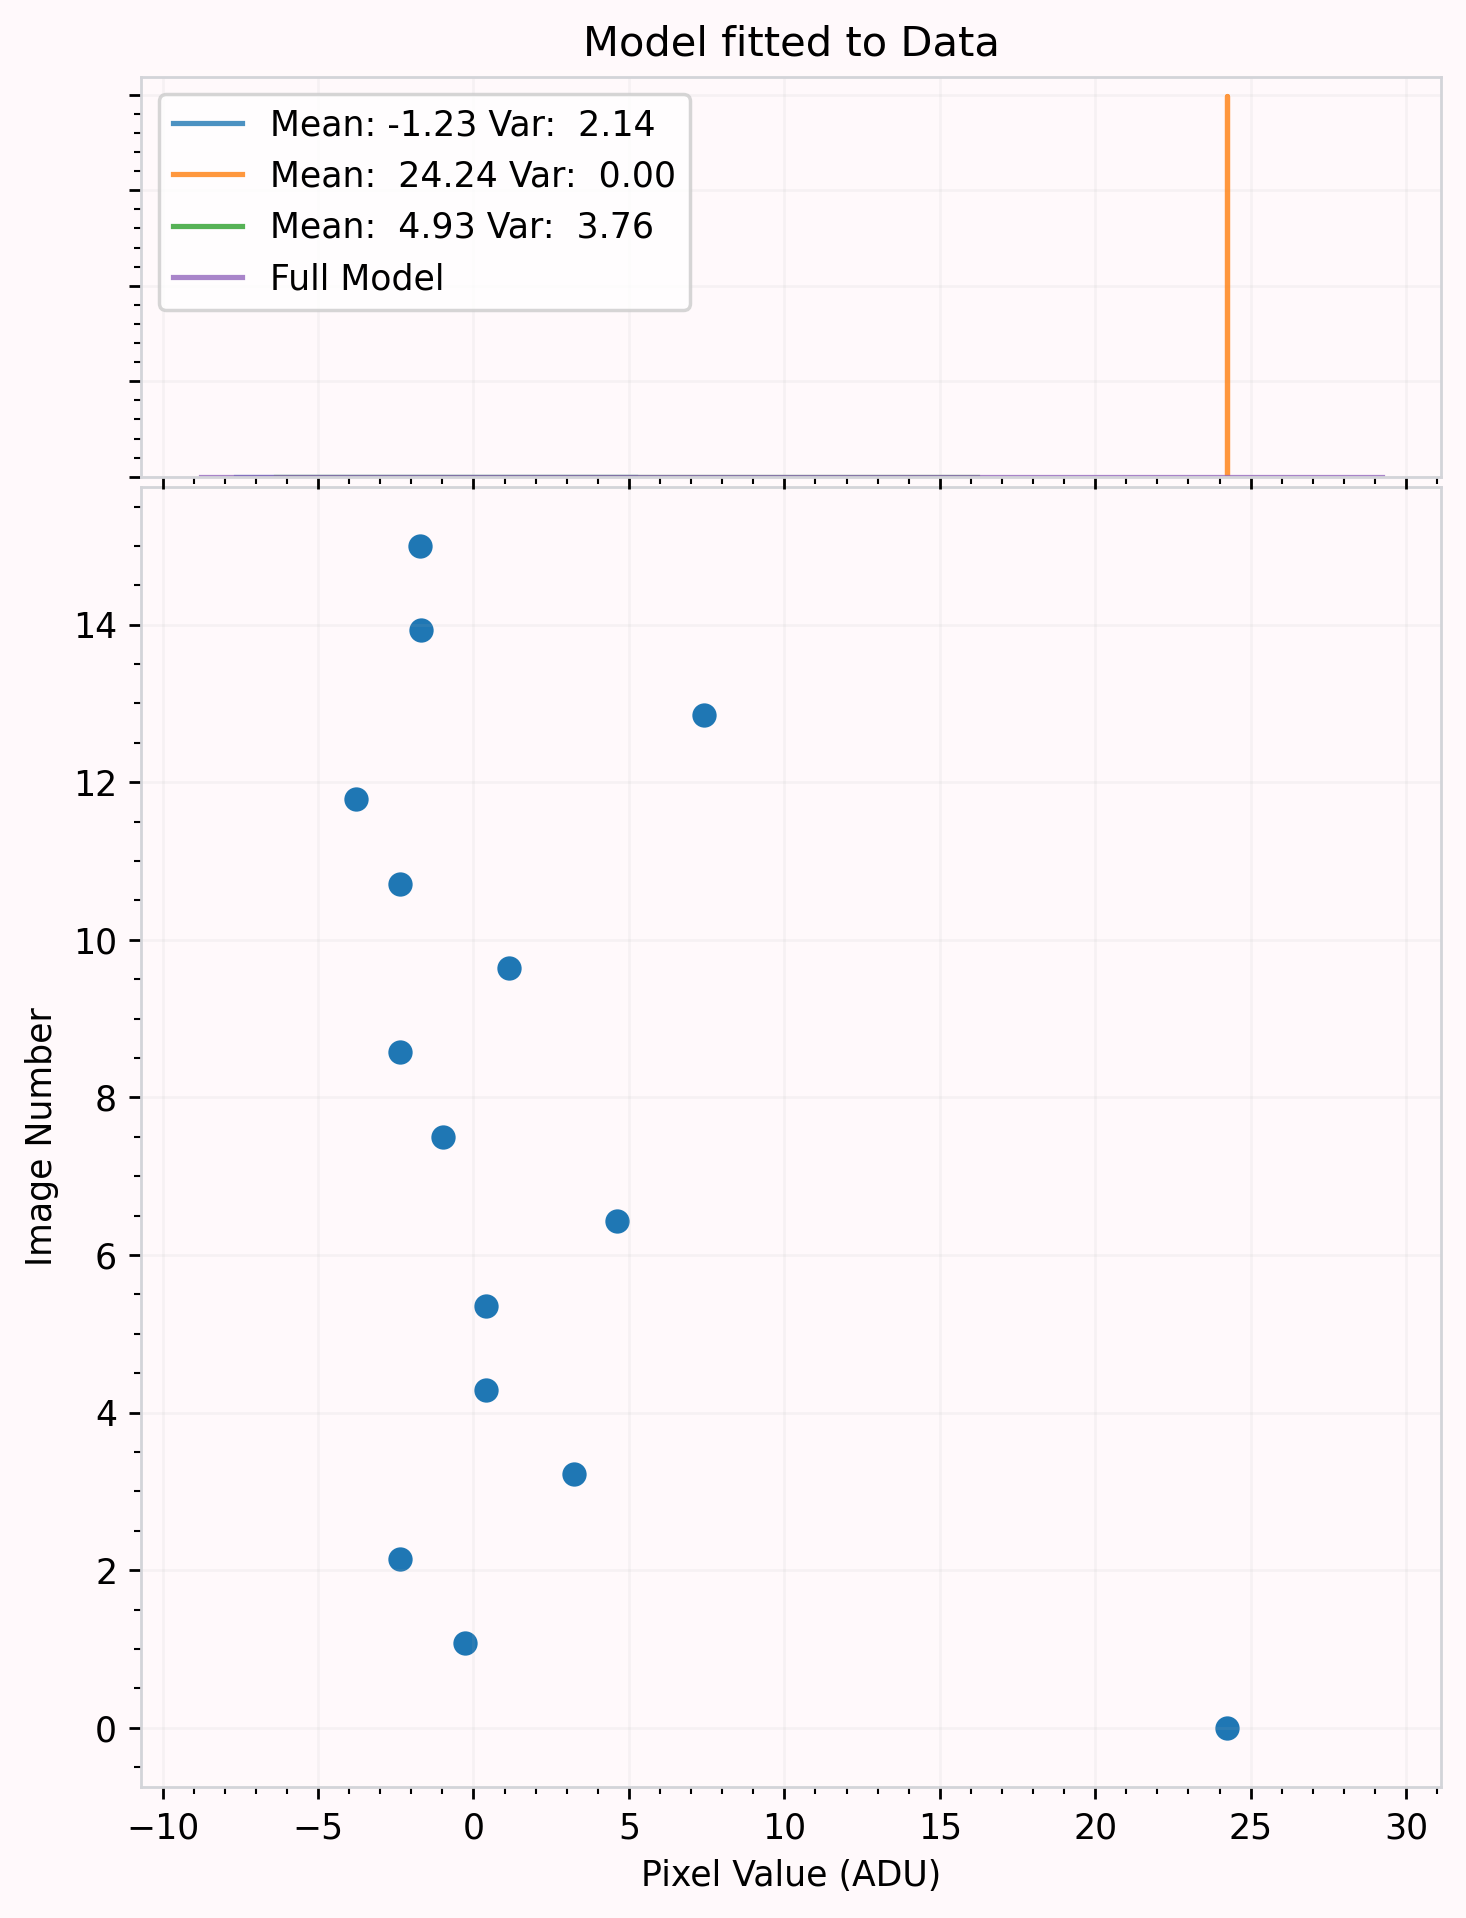

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


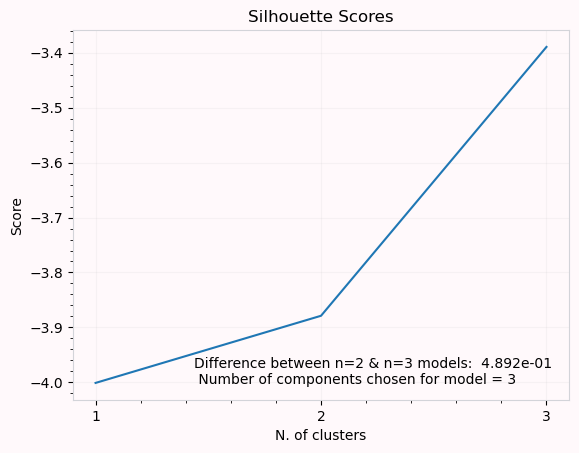

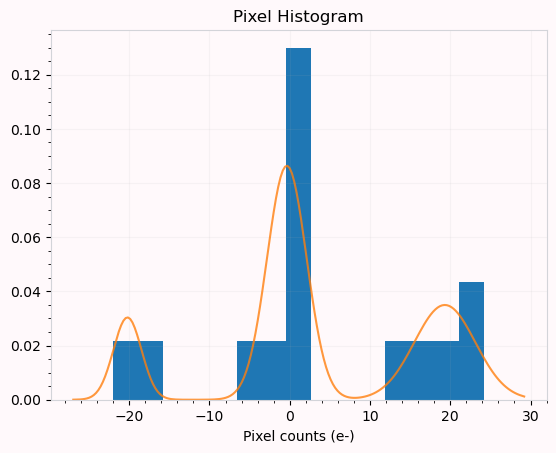

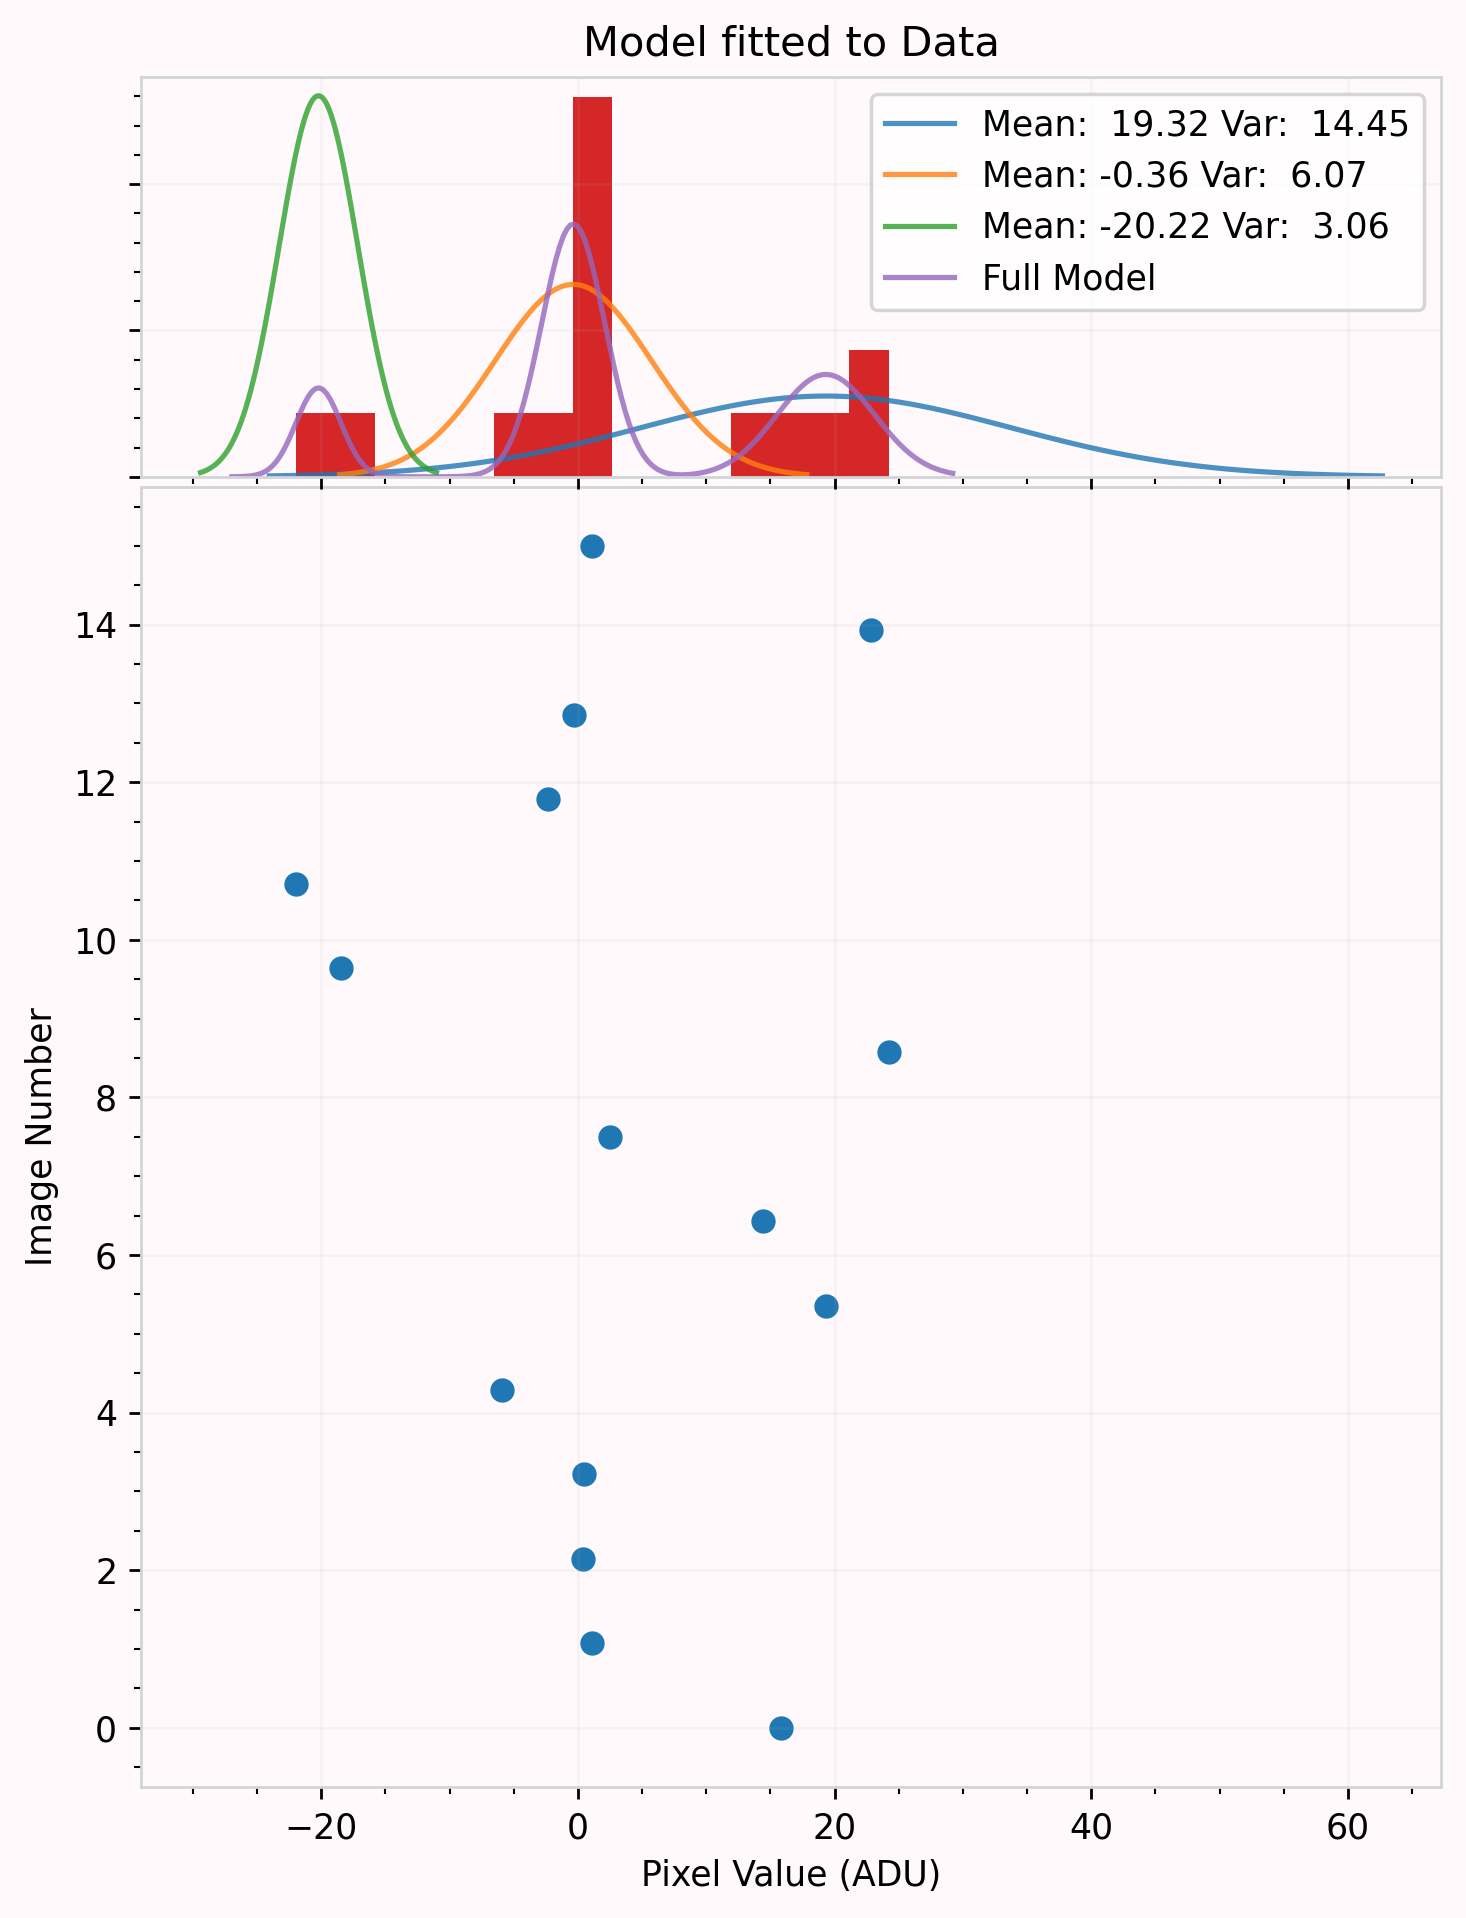

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


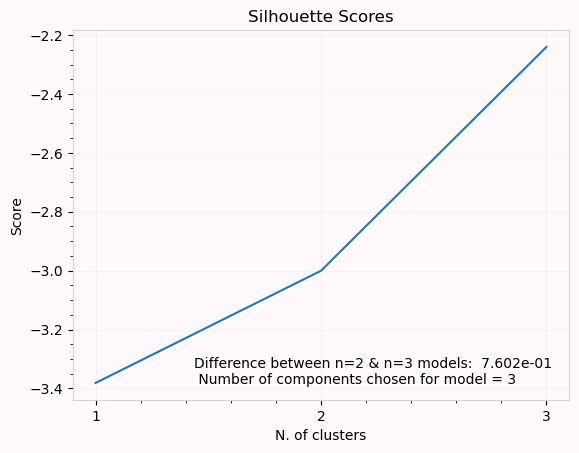

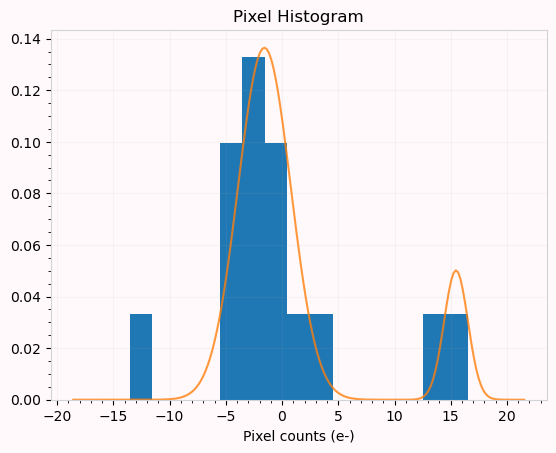

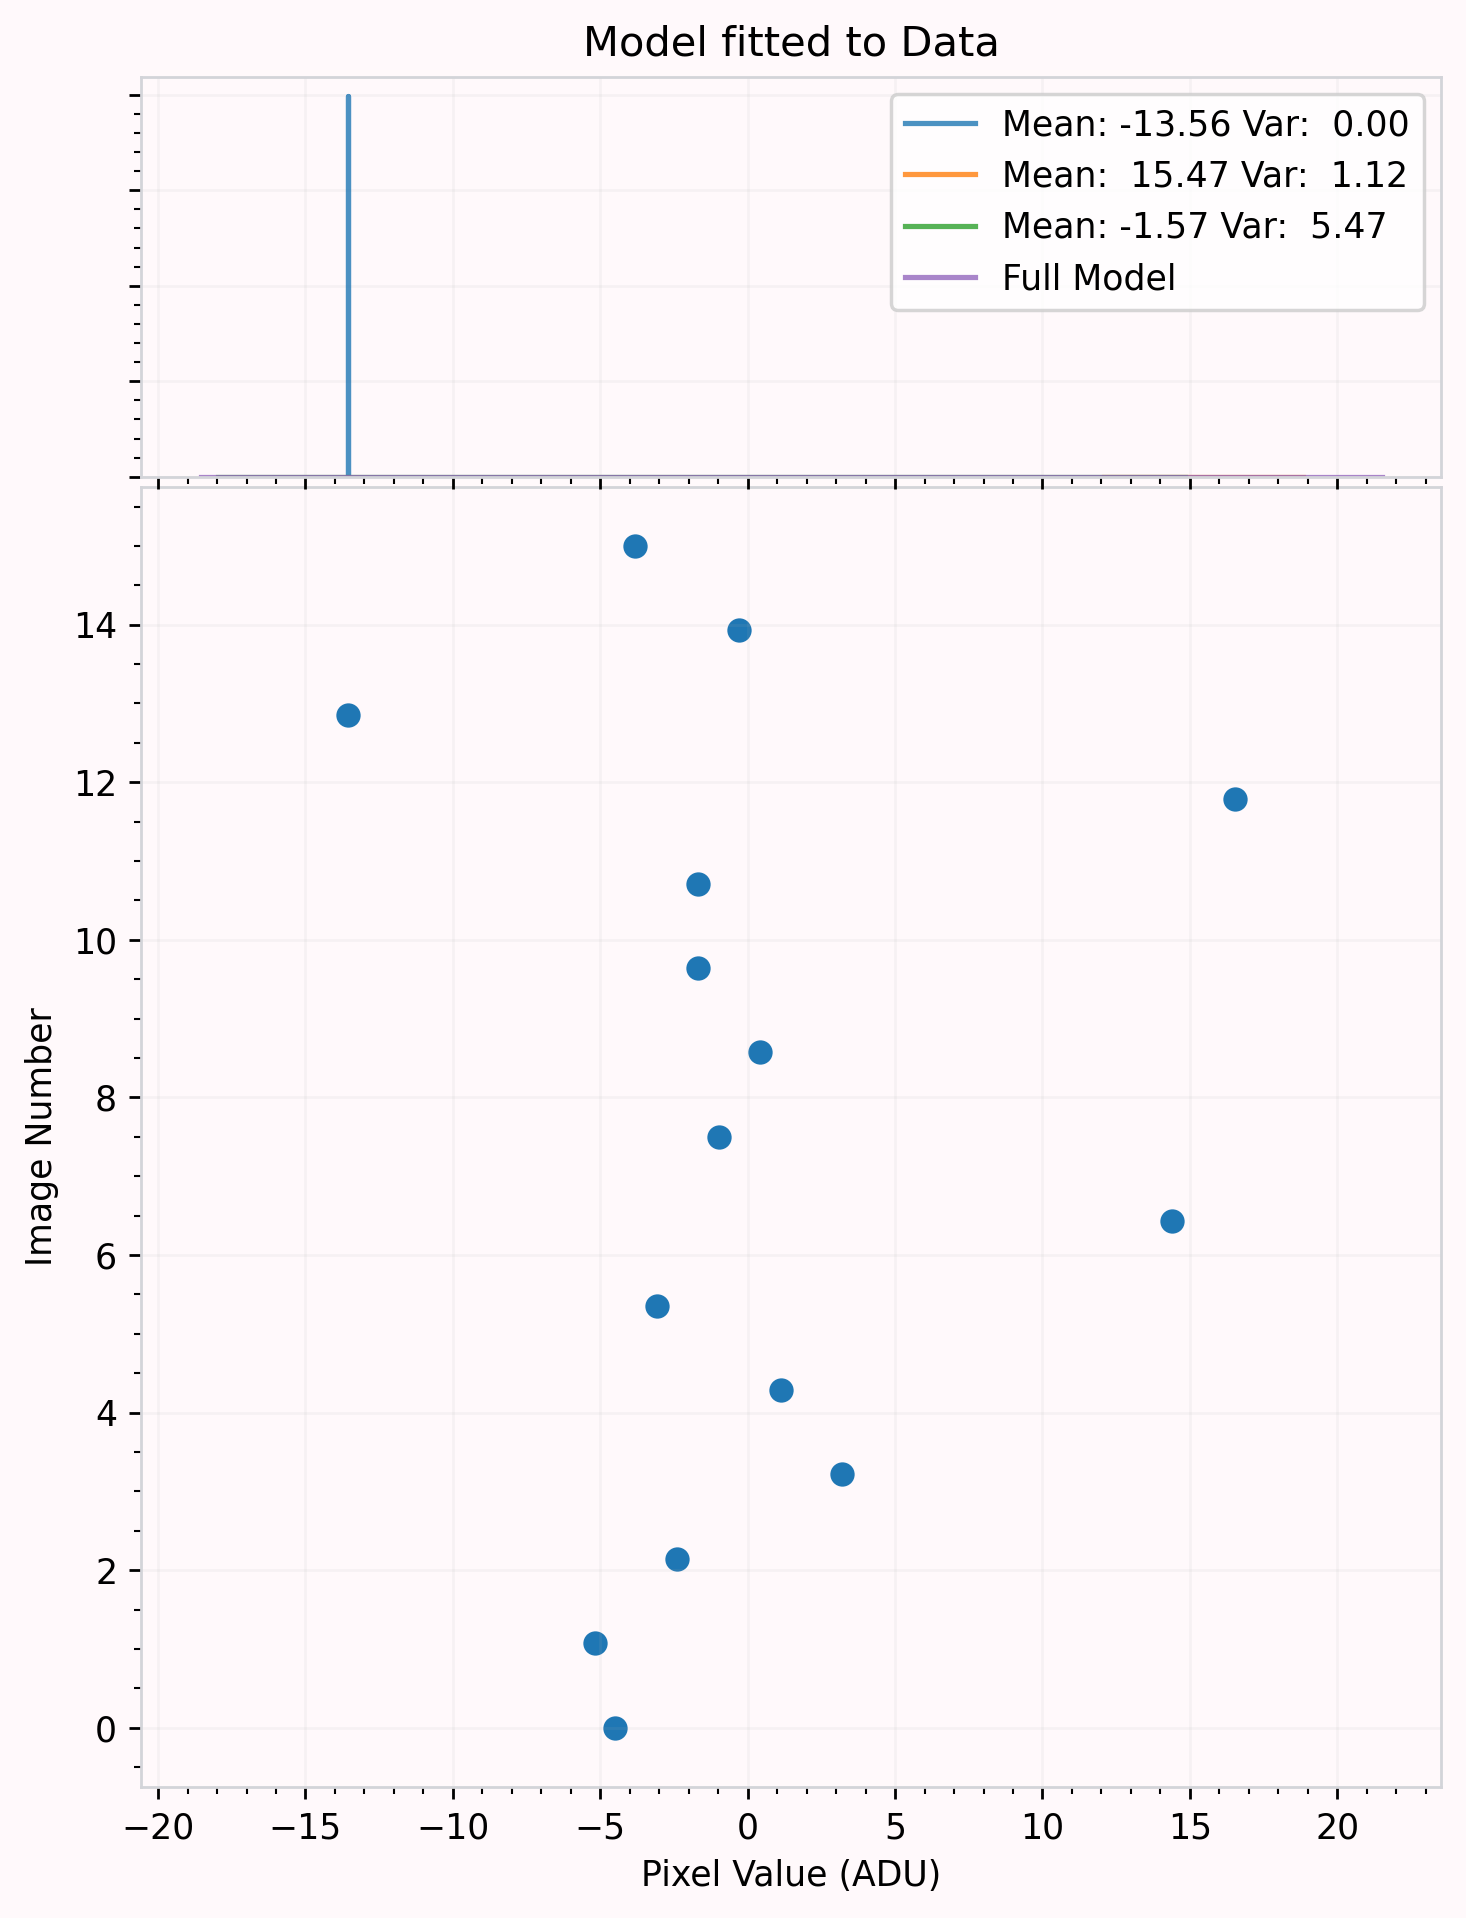

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


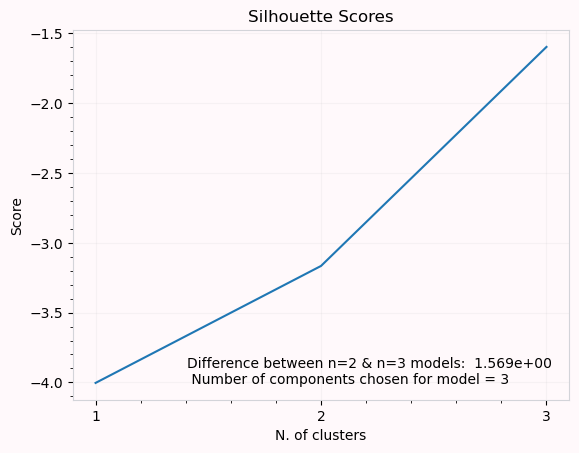

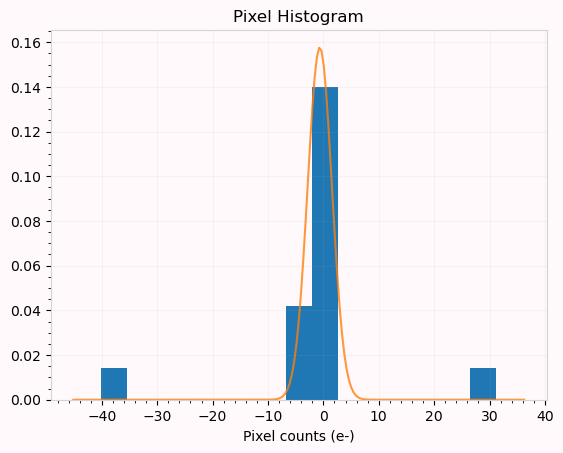

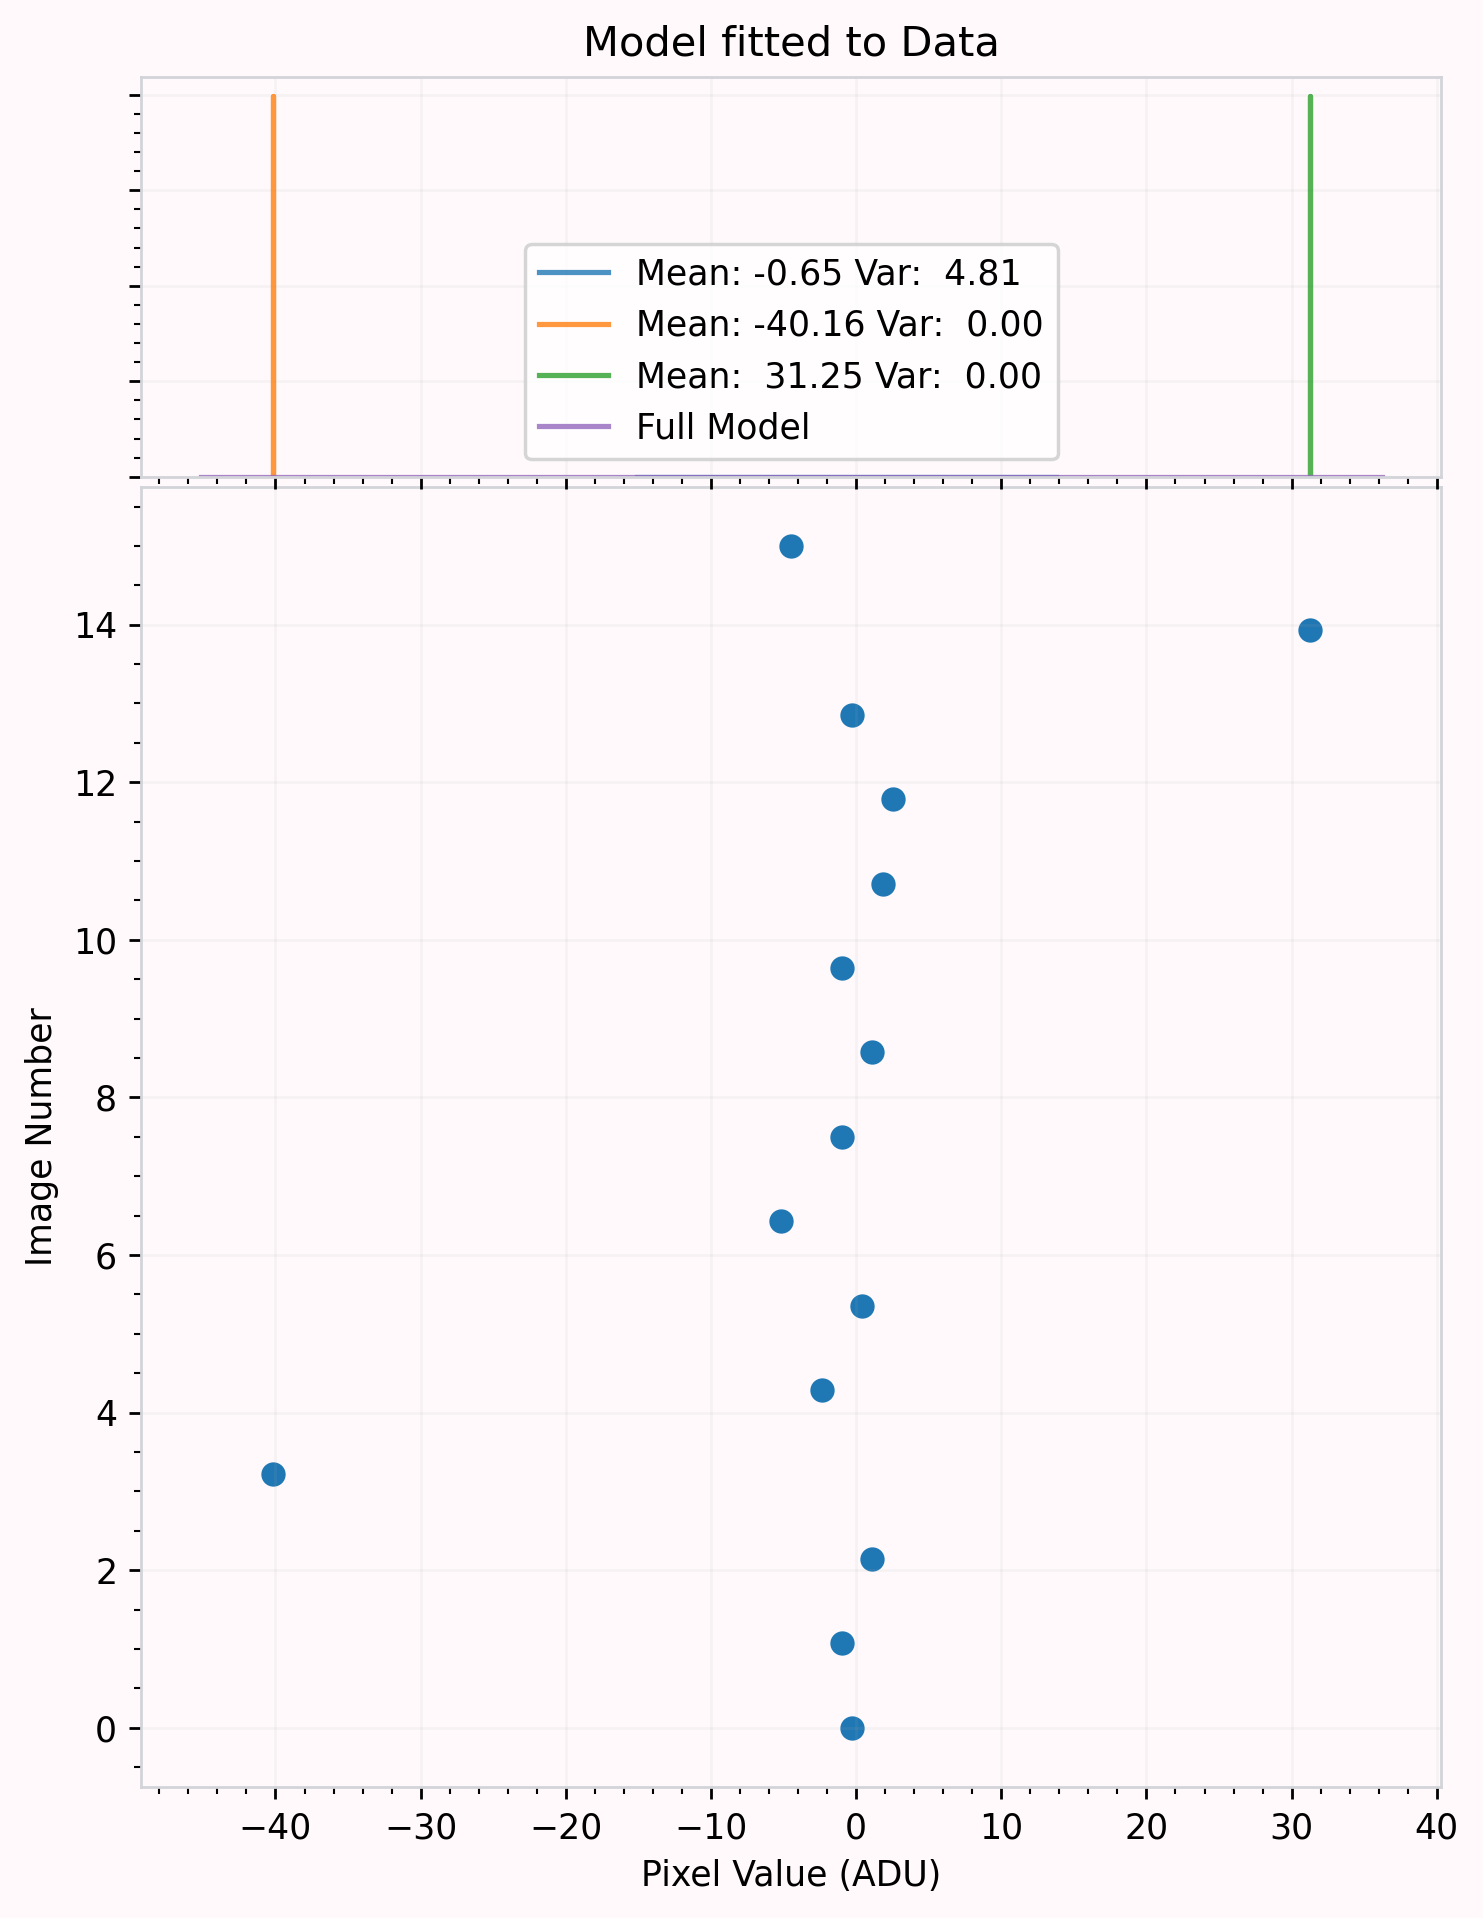

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


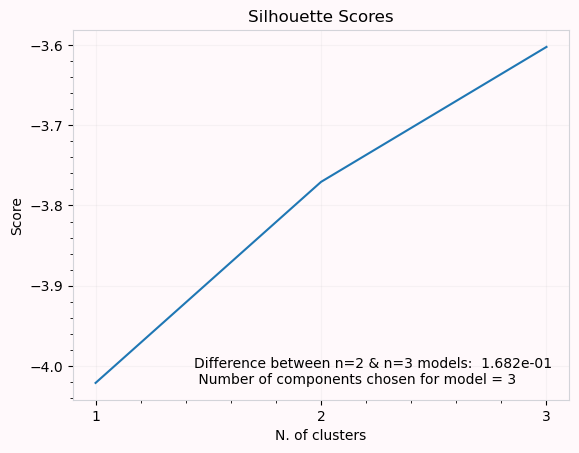

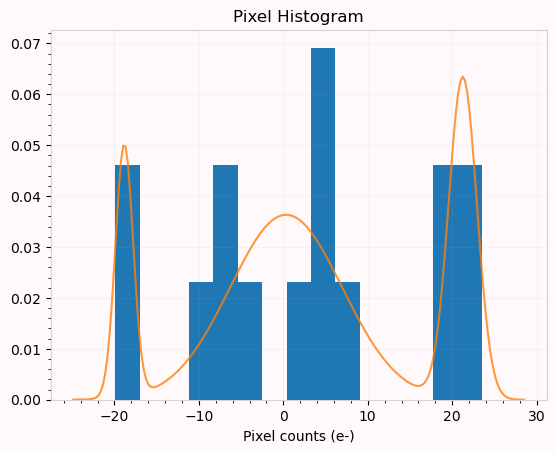

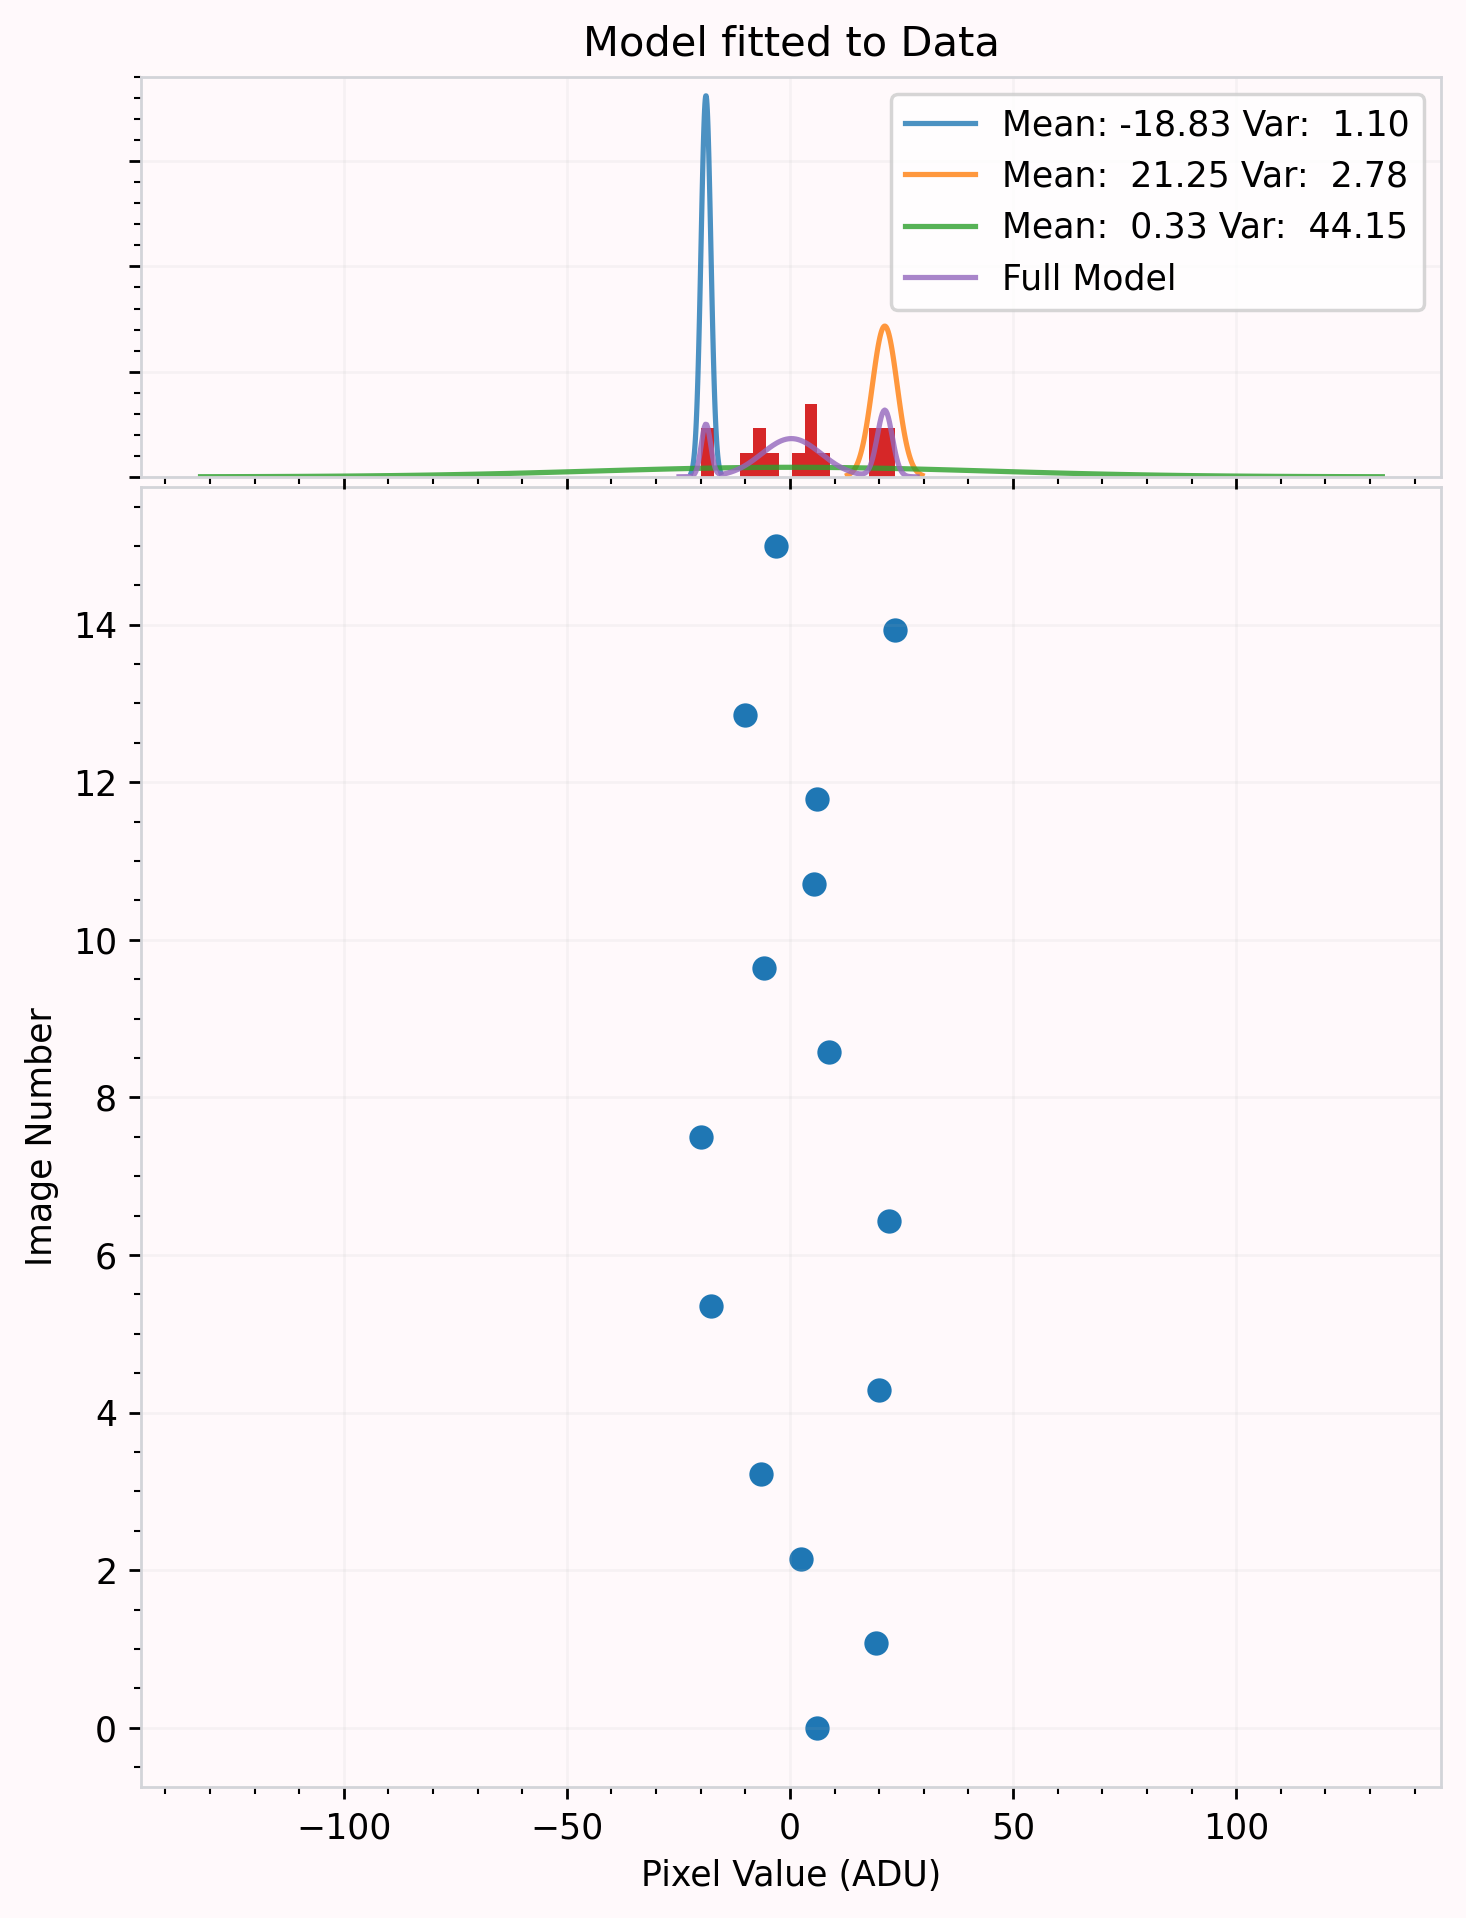

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


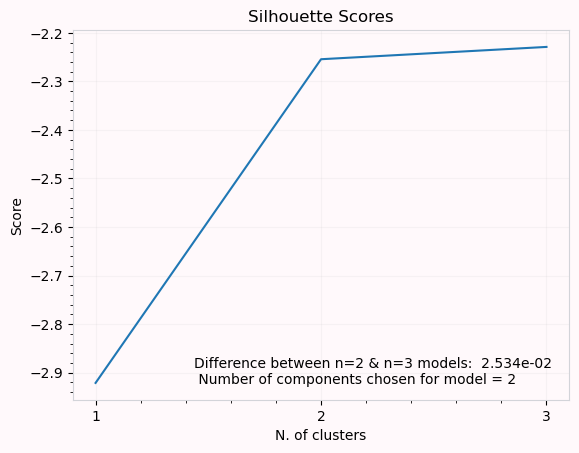

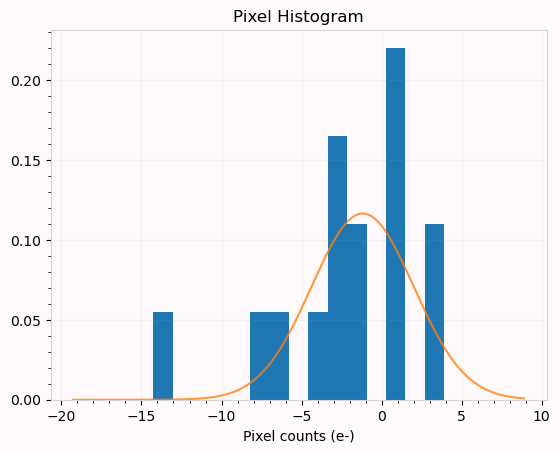

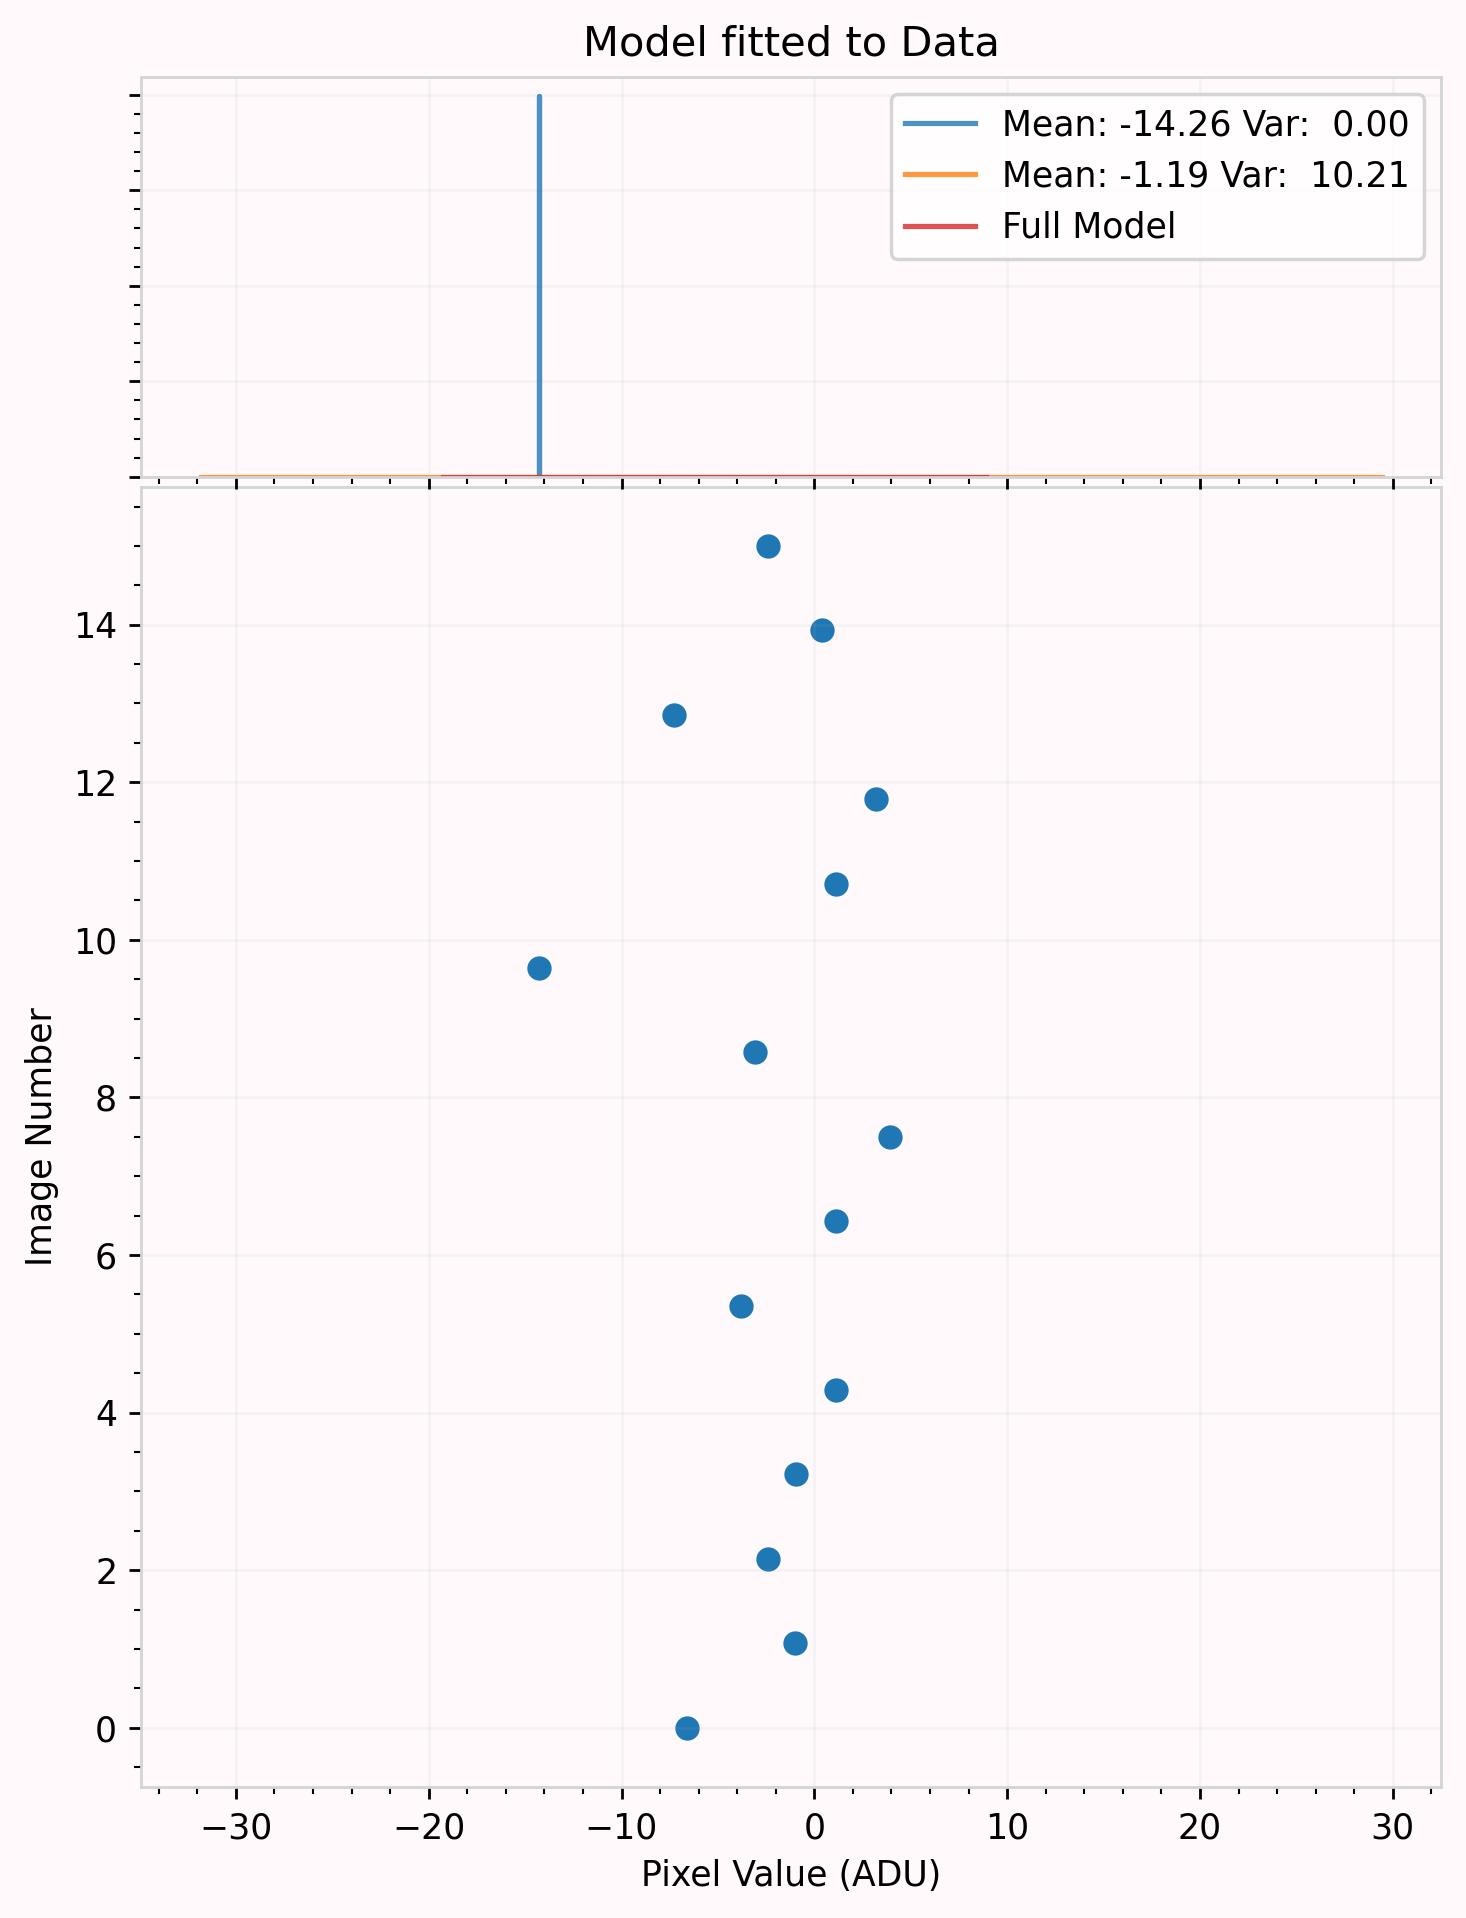

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


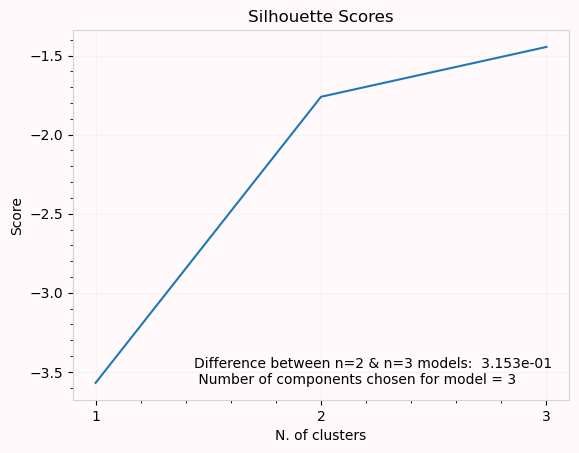

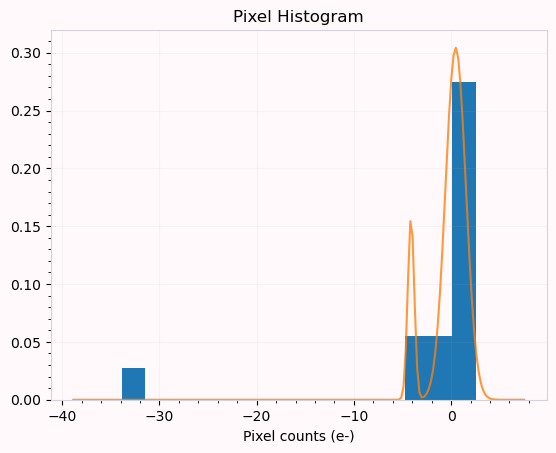

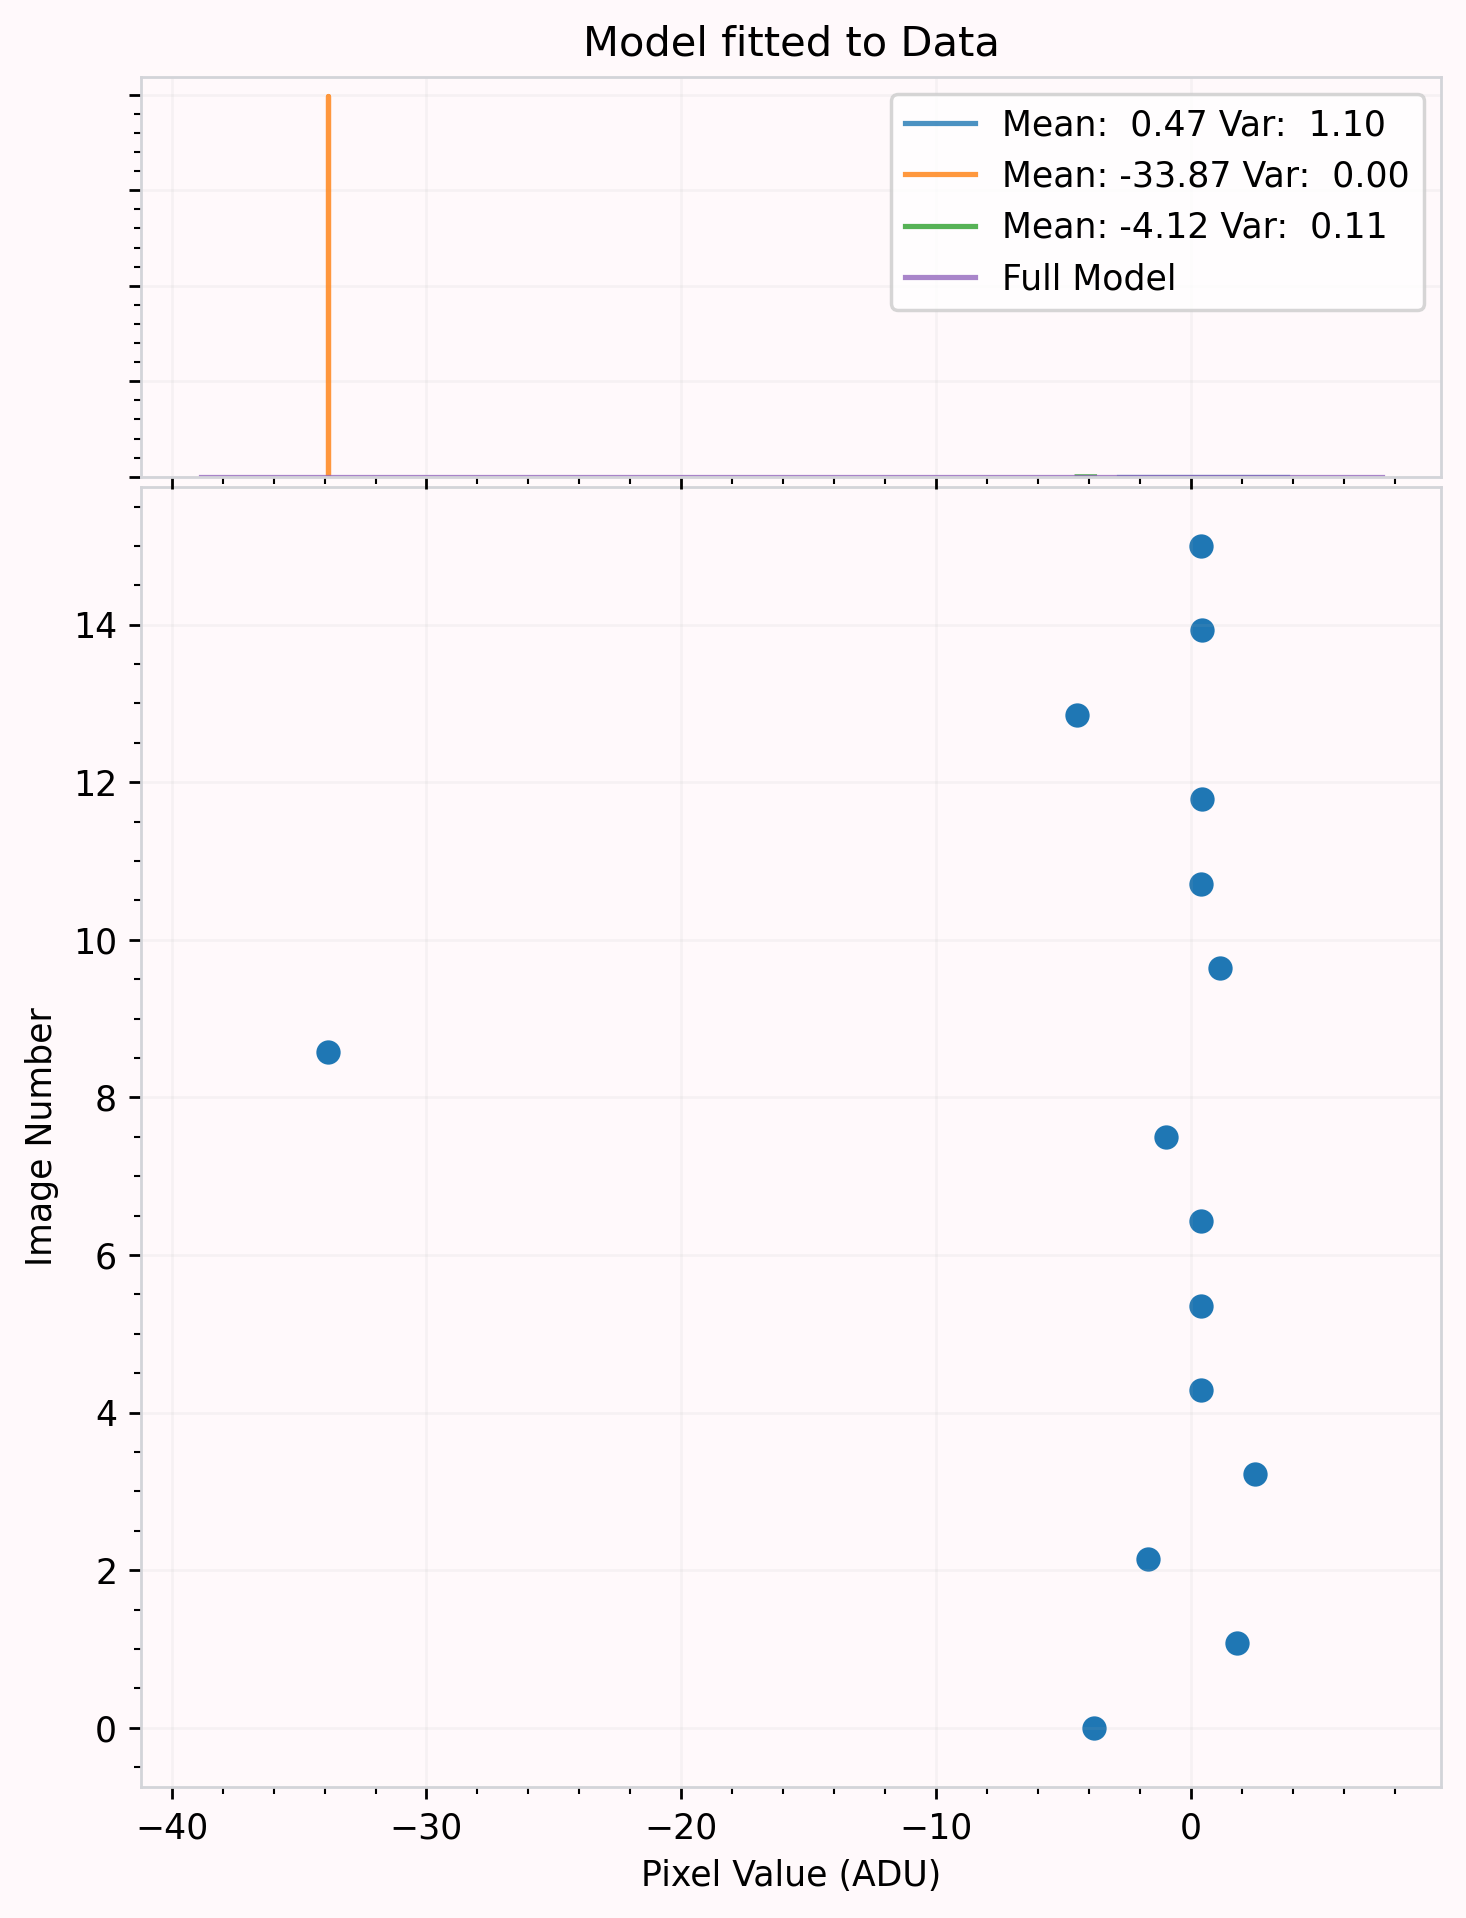

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


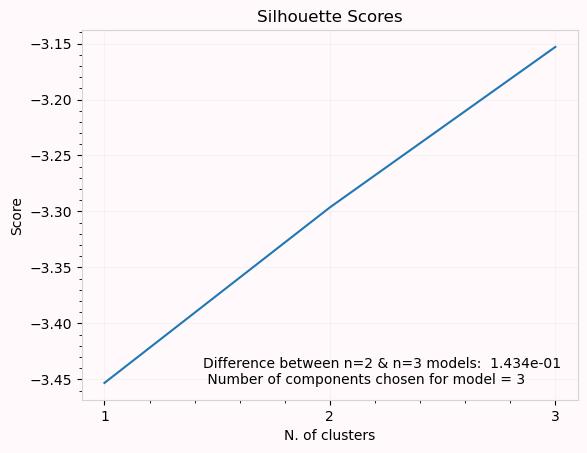

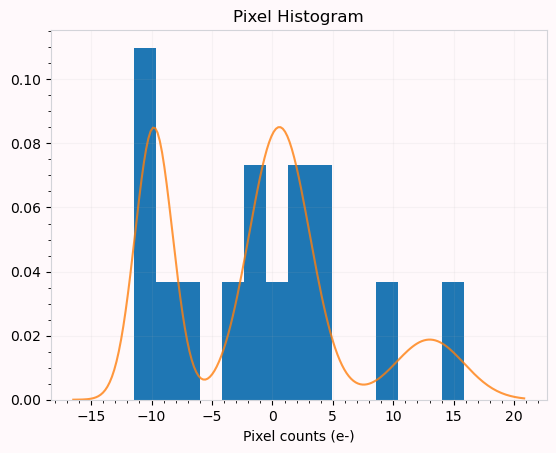

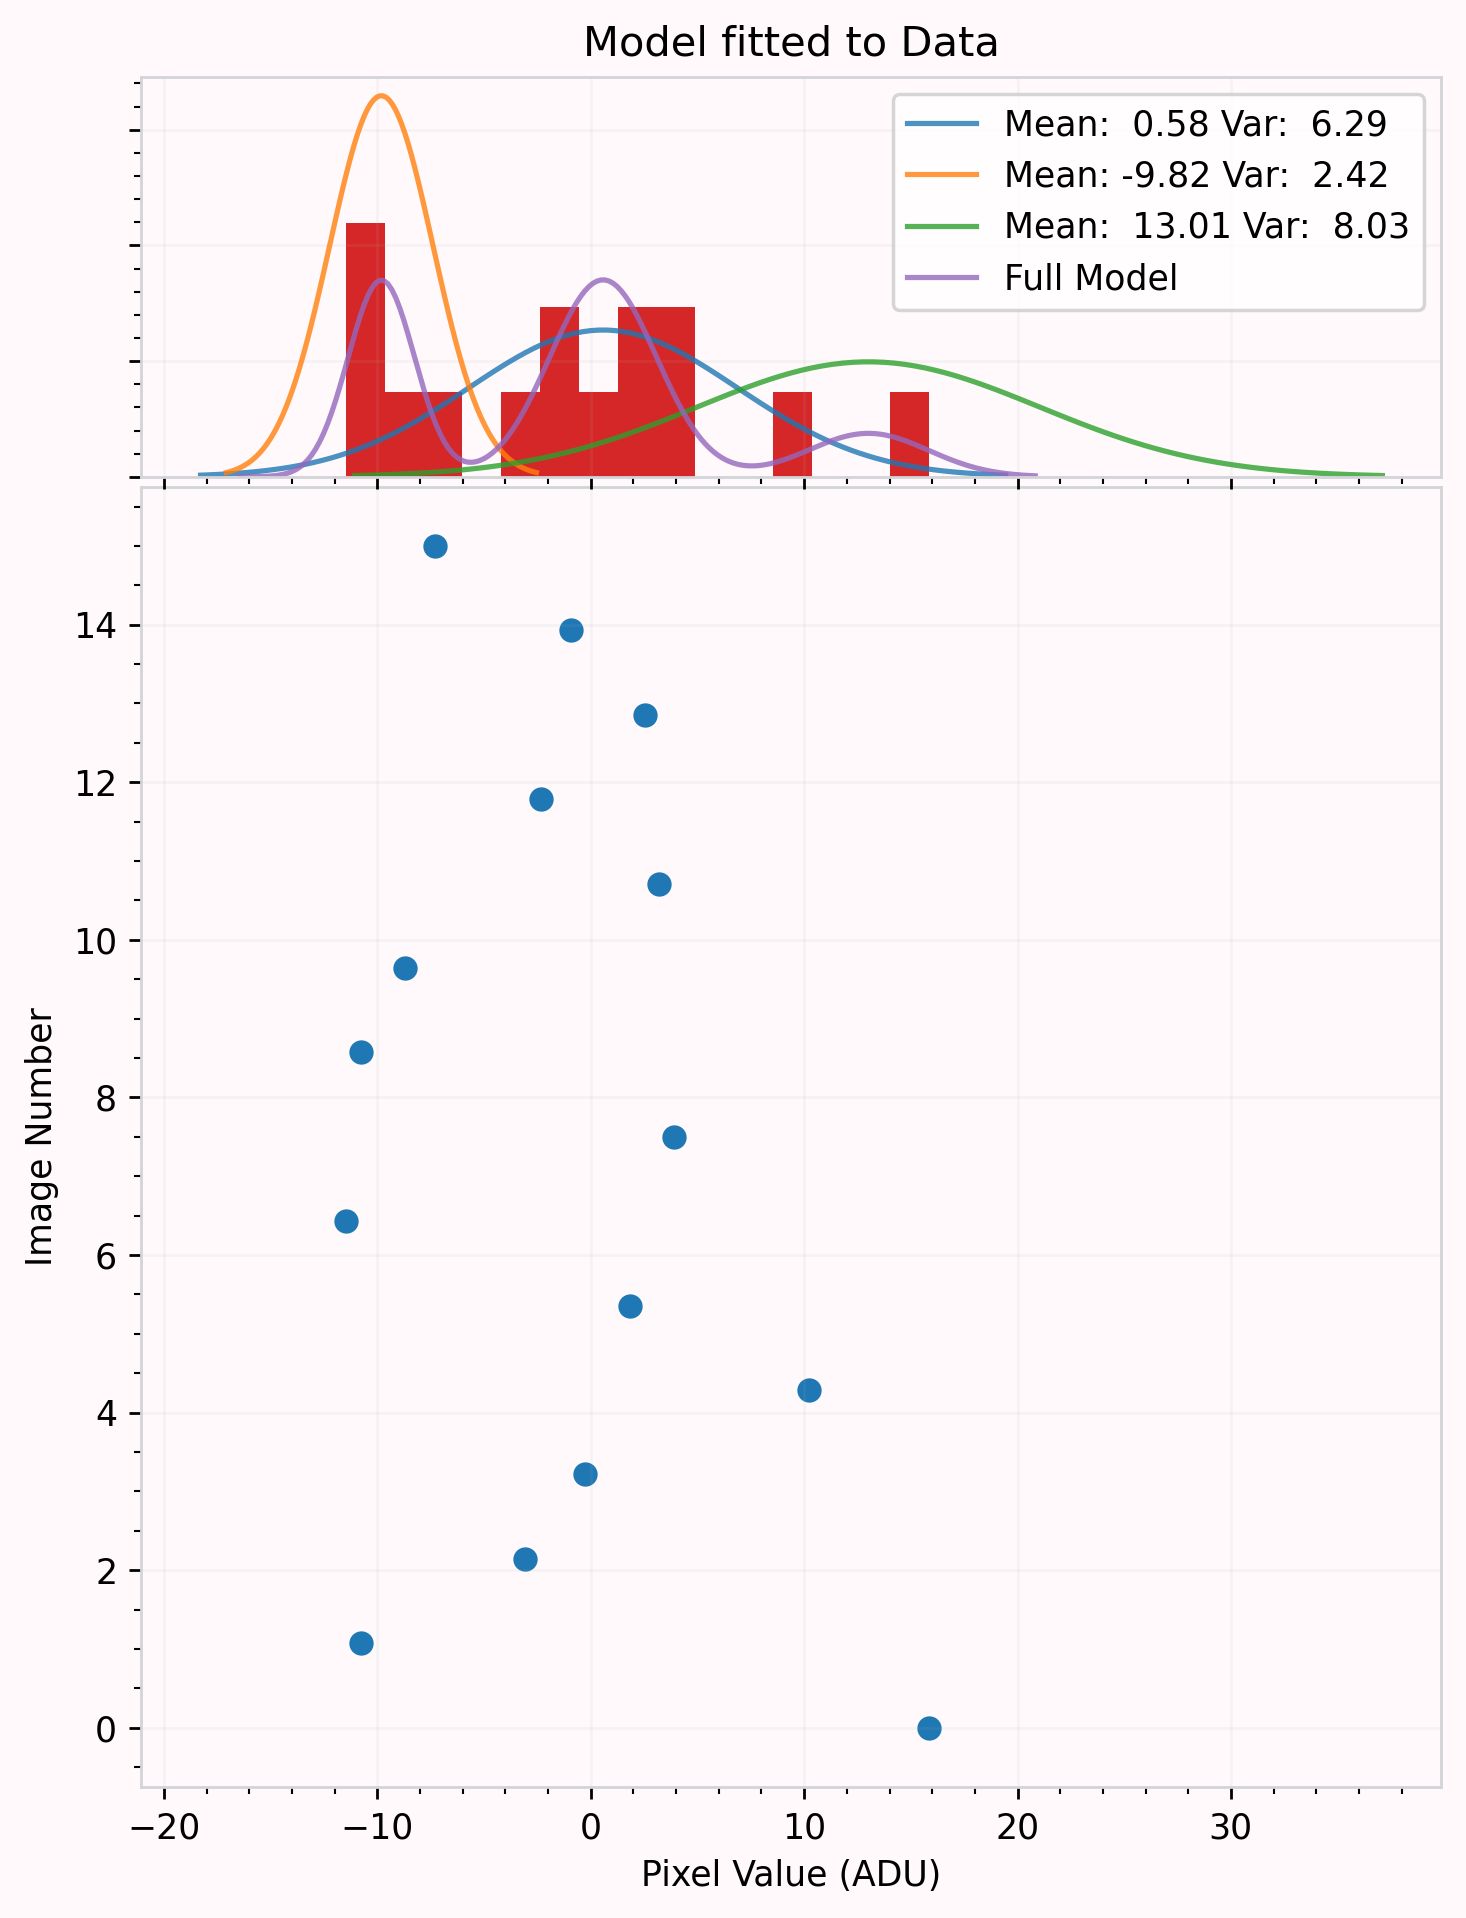

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


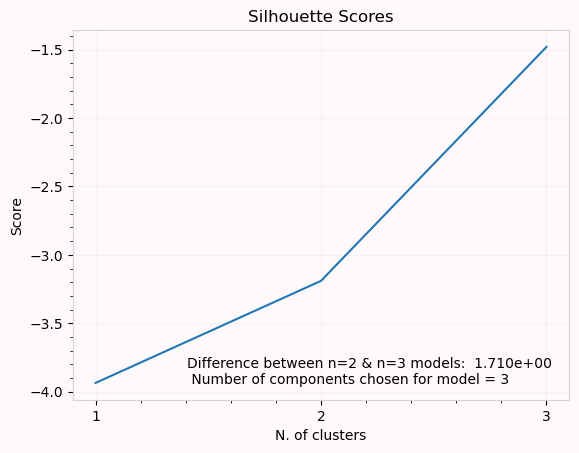

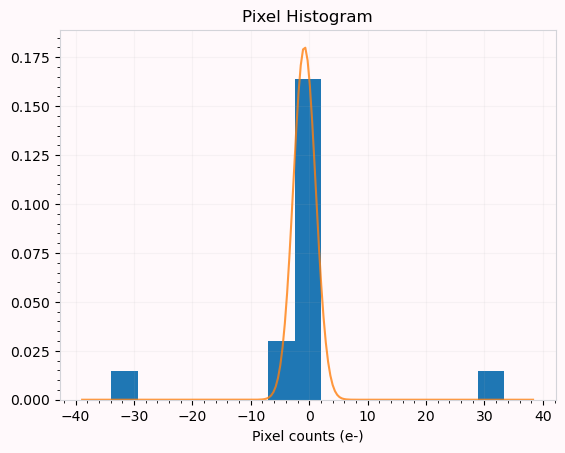

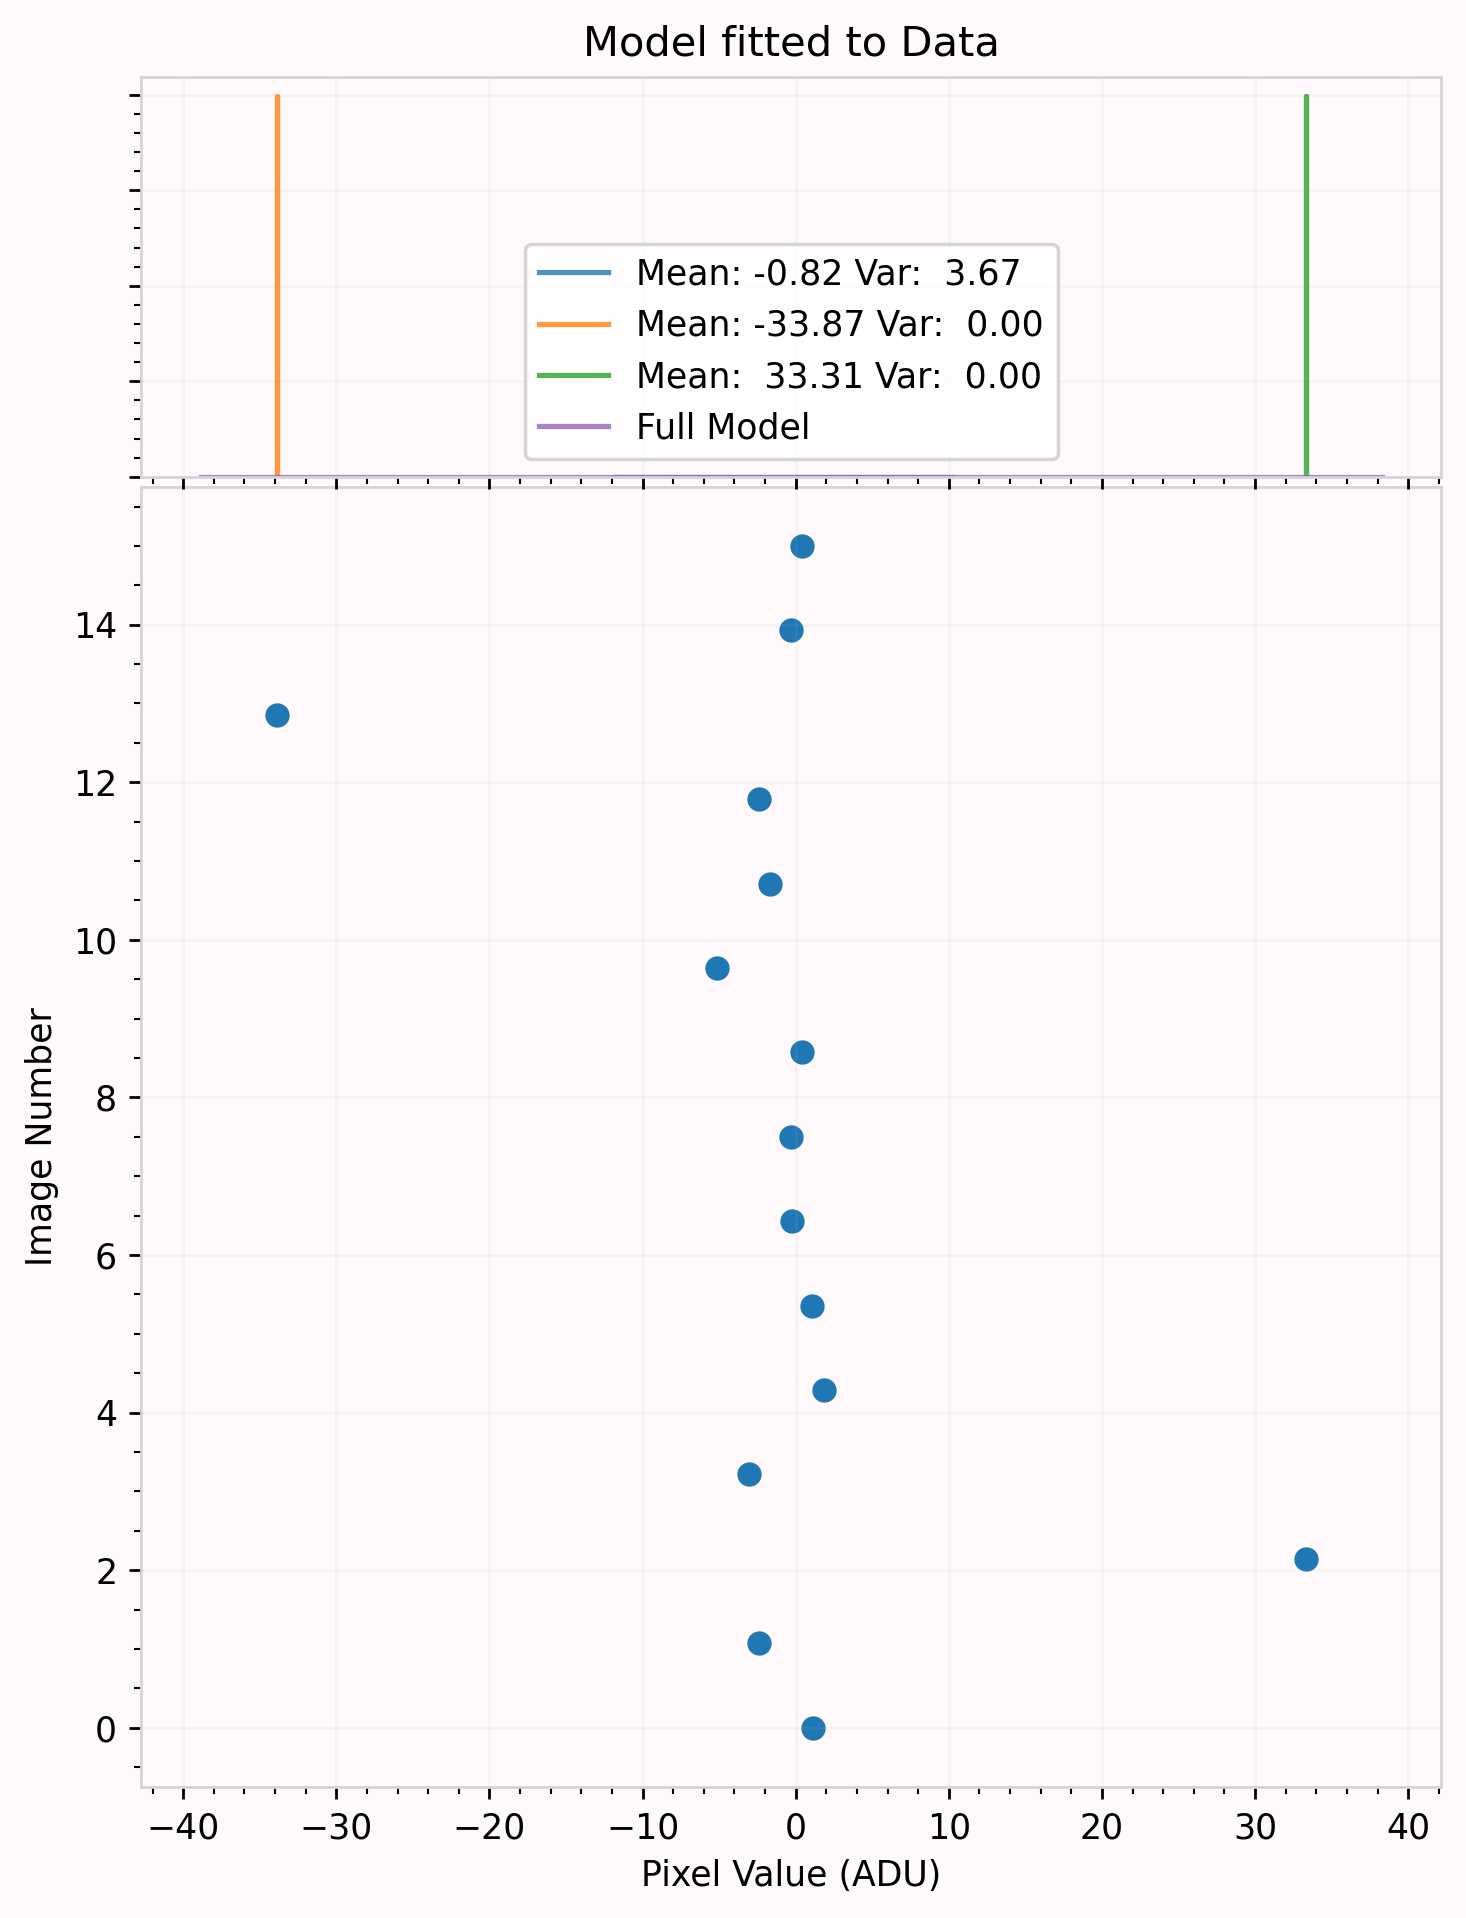

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


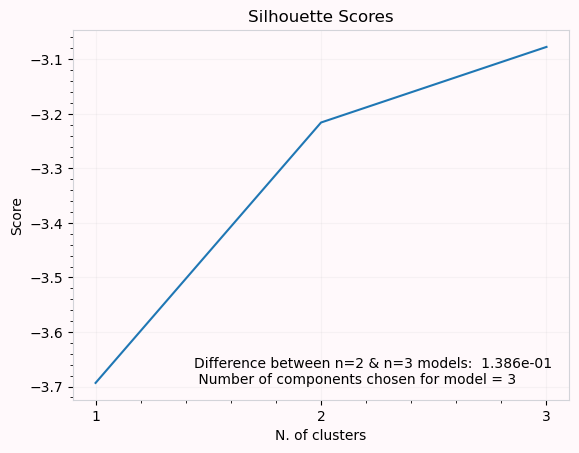

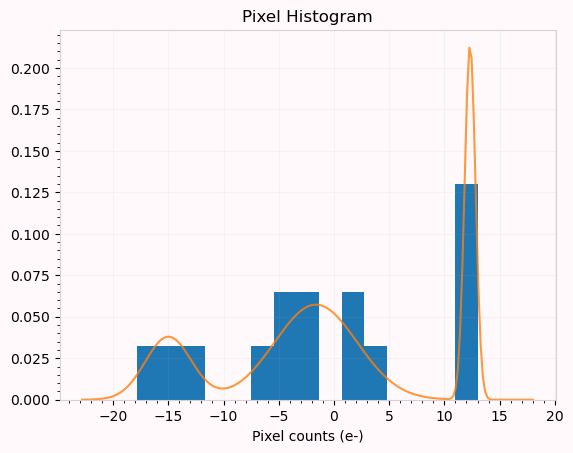

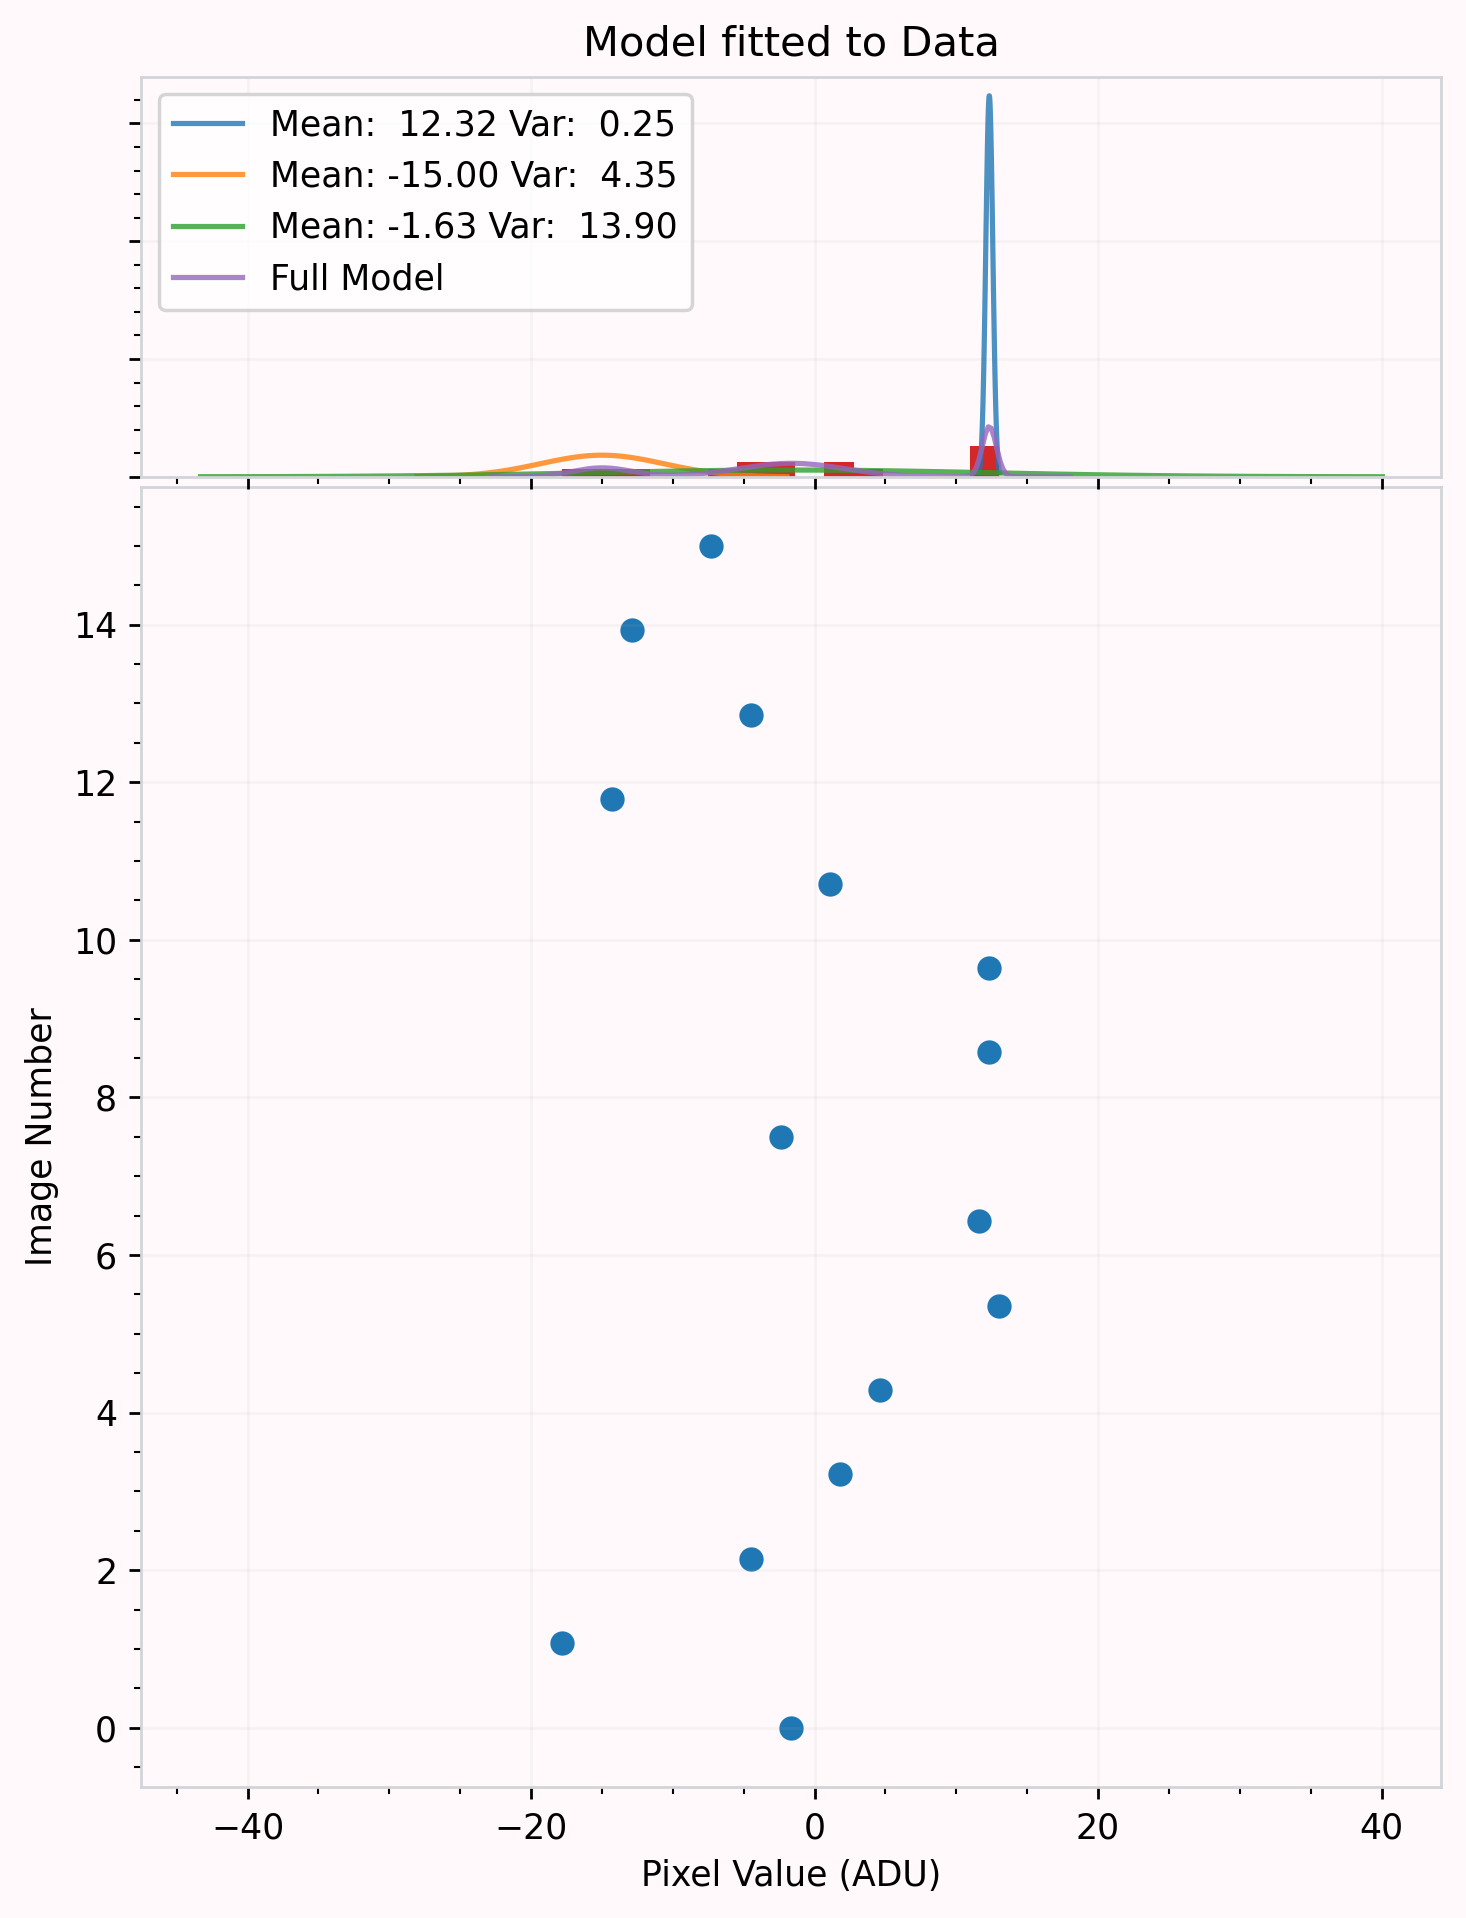

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


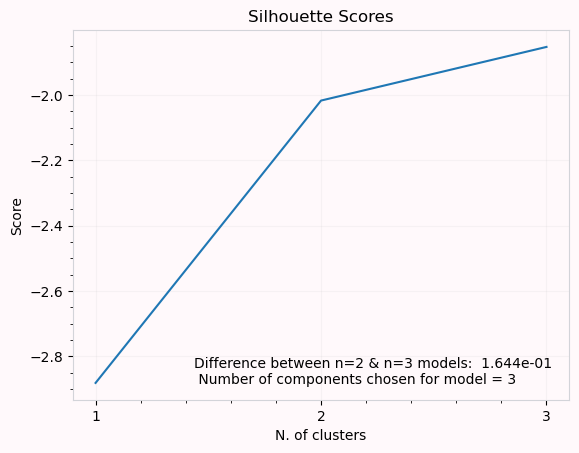

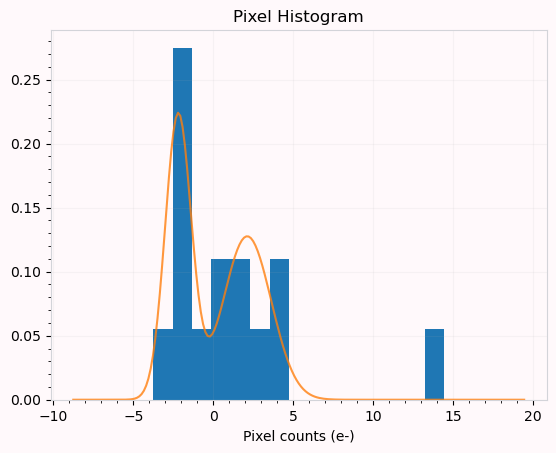

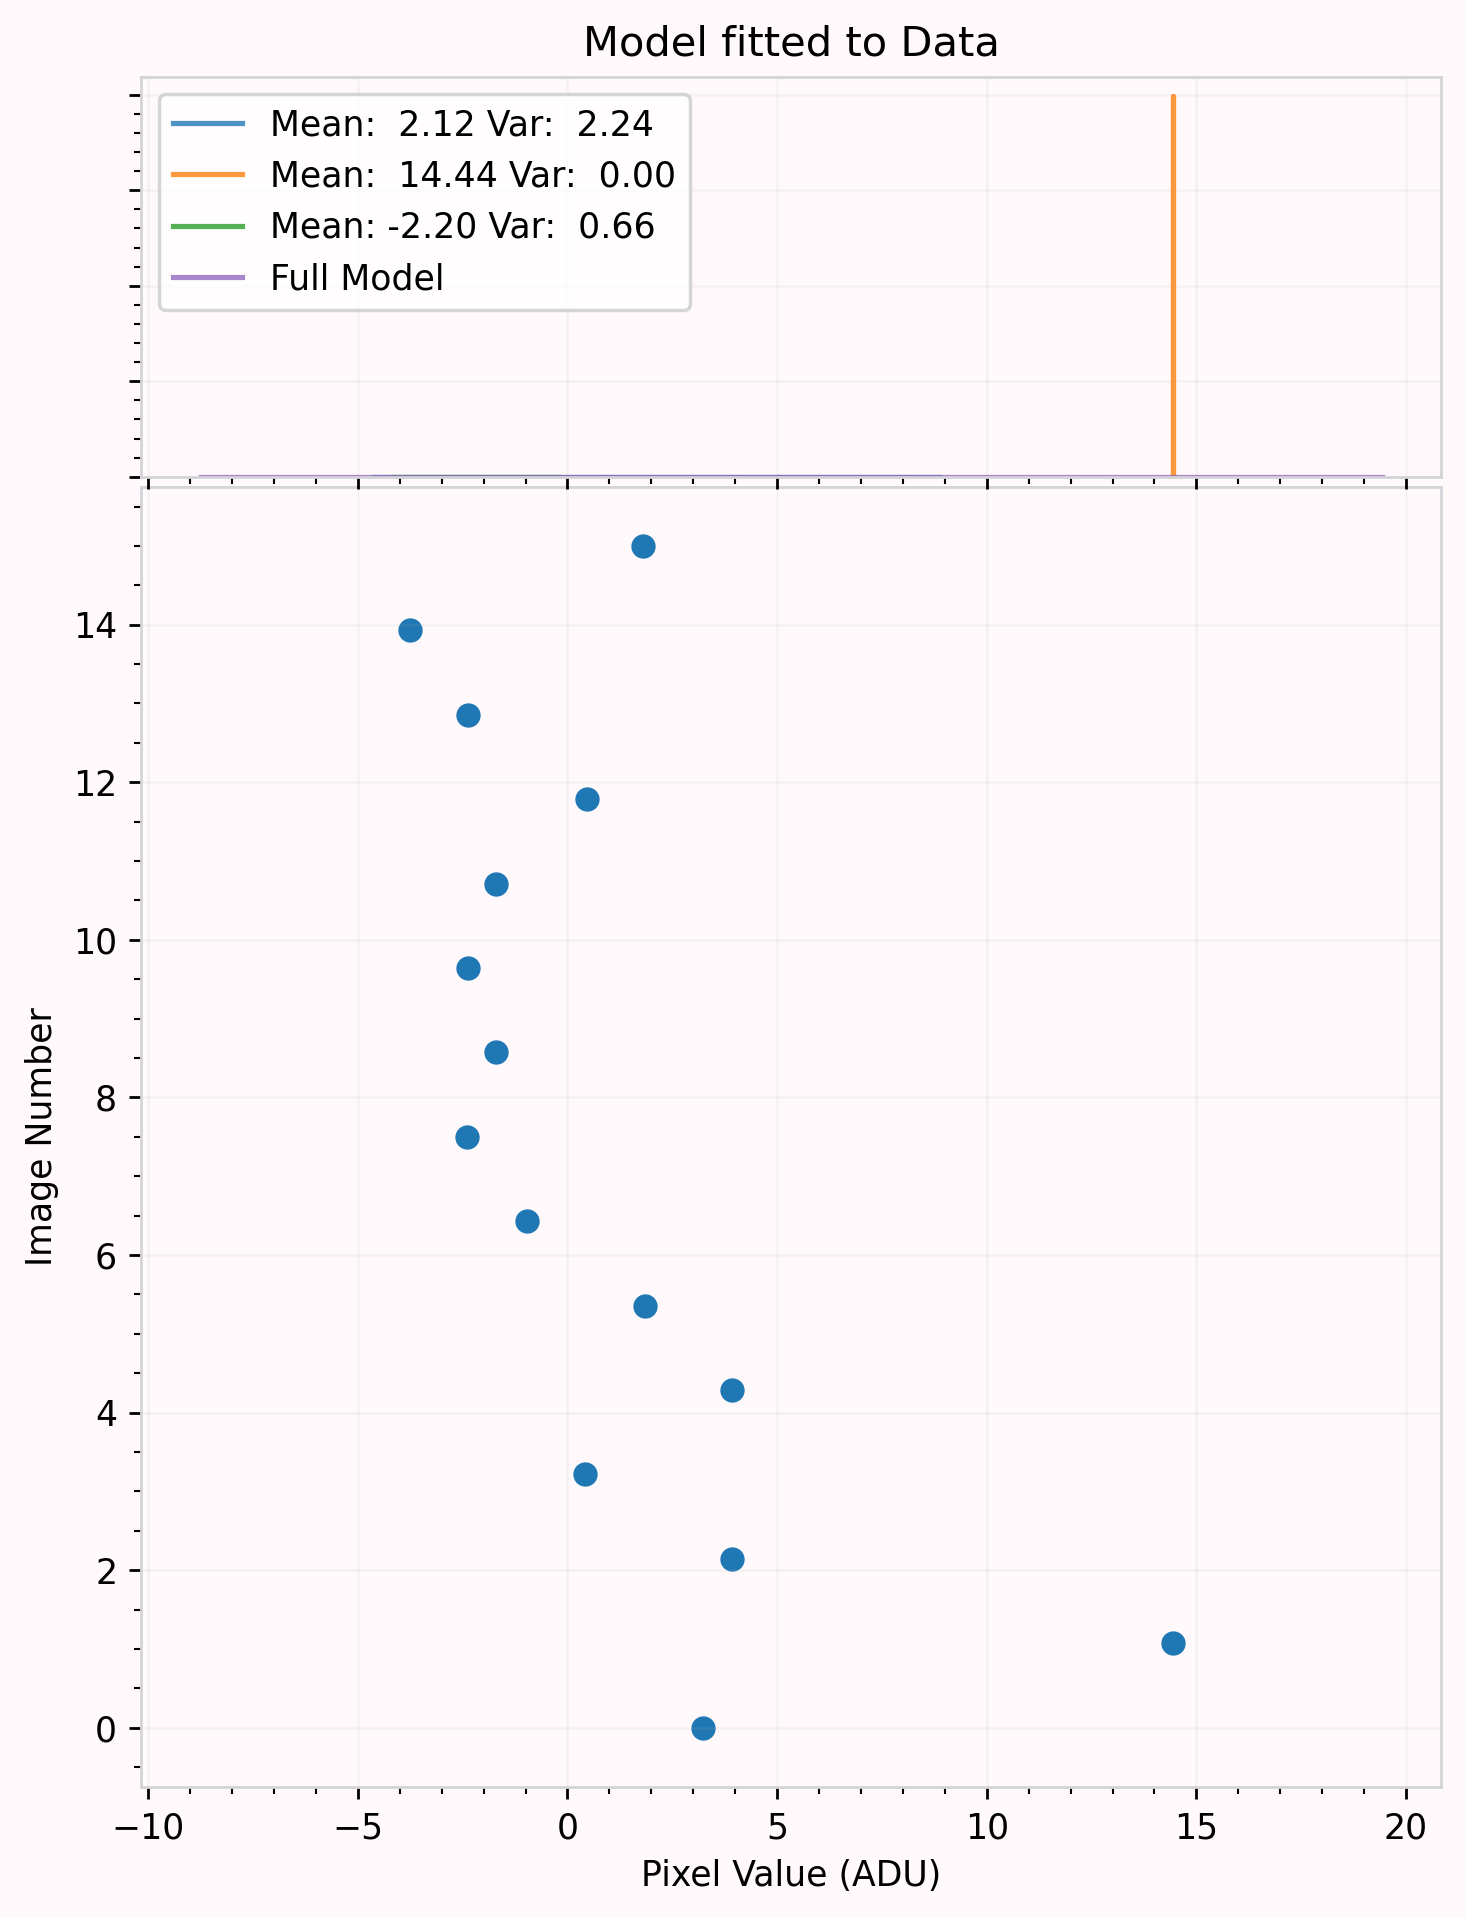

/home/pkottapalli/cmos-noise-map/cmos_noise_map/utils/get_rts_playground.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


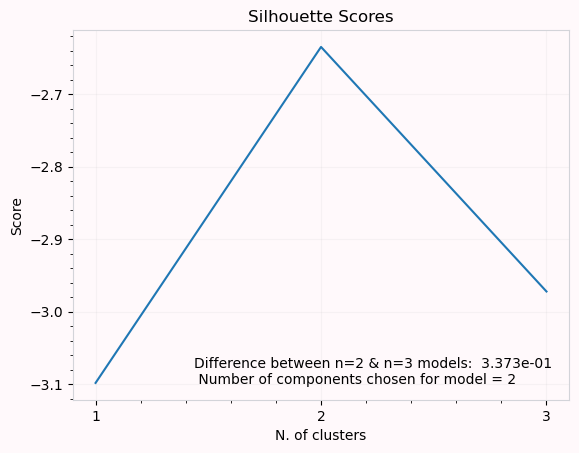

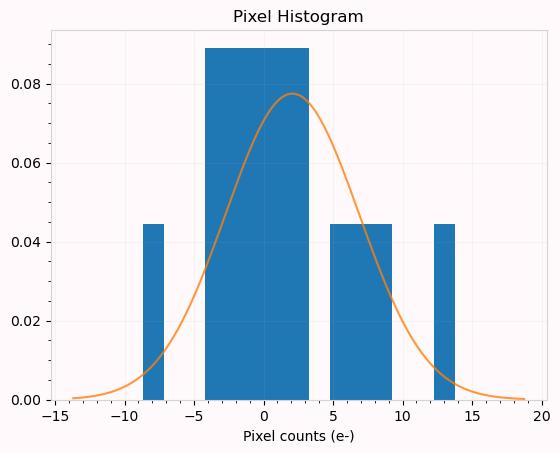

KeyboardInterrupt: 

In [7]:
rts = plot_get_rts(images, data_ext=1, start_row=0, end_row=1, start_column=0, end_column=5)
rts.plot(tolerance=0.05, upper_quantile=3.86, min_peak_separation=10)

We can see that some well defined peaks are at least 20 ADU apart. We can then estimate that for this data, that the minimum peak separation should be about 10 ADU.
<br>
When we look at the 'Silhouette Score' plot, we can see that between the models for 2 and 3 components the score difference isn't very large. To avoid overfitting we want to ensure we always choose a model with 2 components when this happens. Setting the `tolerance` to 0.05, we say that the minimum difference between these two components should be at least 0.05 for us to say confidently that a model with 3 components is more appropriate.